## **Predator & Prey Analysis**

### *Author: Zheng Jing (Grand Prix Scout)*

### **Table of Contents:**

- **Section I - Single Race Index**

- **Section II - Average Index**

- **Section III - Visualization** [*compare 'Joan Mir' with 'Alex Rins', in terms of Efficiency, Net, Volatility*]

----------------------------------------------------------------------------------------------------------------------------
** *Description: in this file, we compute the following indexes for 22 MotoGP riders, at each circuit, from 2015 to 2019* **

All the data (Lap charts) are collected from MotoGP official website https://www.motogp.com/en/Results+Statistics.

Formulas for computing the indexes as follows:

- **Grid** = *Rider's starting position, determined from the qualifying race*

- **Final** = *Rider's final position*

- **Predator** = *the total number of positions that a rider moves forward, regardless of him moving backward*

- **Prey** = *the total number of positions that a rider moves backward, regardless of him moving forward*

- **Net** = *Predator - Prey* = *Final - Grid*, (which measures a rider's pure movement/displacement throughout the entire race)

- **Volatility** = *Predator + Prey*, (which measures a rider's riding style - high means aggressive; low means conservative)

- **Efficiency** = *Net/Volatility*, (the percentage of efficient movements)

> For example, a rider has net =2 and volatility = 10 . That means only 2 out of 10 moves are efficient for moving forward, and the other 8 moves are 4-4 cancelled off. So net/volatility = 2/10 = 20% gives us the efficiency of the rider’s movement.

- **Weighted Predator** = *Predator - Grid*, (a way to compare riders' offensive ability by taking grid position into account)

- **Weighted Prey** = *the number of total riders - Grid - Prey*, (a way to compare riders' defensive ability by taking grid position into account)
----------------------------------------------------------------------------------------------------------------------------

# Section I - **single race index**

**In this sectoin, we **
- first compute the indexes for all the riders at each individual race
- then combine all the index tables into one giant table
- lastly compute the average indexes by aggregating the table by rider, circuit, and year respectively

## 1. Create two dictionaries to store riders' names and their bike numbers
##### *The new dictionary captures Maverick Vinales's number change in 2019*

In [1]:
# bike number - 2015 to 2018
rider_index_old = [41,42,4,29,35,9,20,63,21,55,43,
                   36,5,99,17,93,25,88,44,30,53,46]

# bike number - 2019
rider_index_new = [41,42,4,29,35,9,20,63,21,55,43,
                   36,5,99,17,93,12,88,44,30,53,46]

# 22 rider names
rider_names = ["Aleix Espargaro", "Alex Rins", "Andrea Dovizioso",
               "Andrea Iannone", "Cal Crutchlow", "Danilo Petrucci",
               "Fabio Quartararo","Francesco Bagnaia","Franco Morbiedelli", 
               "Hafizh Syahrin", "Jack Miller", "Joan Mir", "Johann Zarco",
               "Jorge Lorenzo", "Karel Abraham", "Marc Marquez", 
               "Maverick Vinales", "Miguel Oliviera","Pol Espargaro",
               "Takaaki Nakagami","Tito Rabat","Valentino Rossi"]

# dictionary: match bike number to rider names (2015-2018)
rider_dic_old = dict(zip(rider_index_old, rider_names))

# dictionary: match bike number to rider names (2019)
rider_dic_new = dict(zip(rider_index_new, rider_names))

In [2]:
# for nice printing purpose
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#### Dictionary Format - {bike number : rider name}

In [3]:
print(color.RED + color.BOLD + "Old Dictionary - (2015~2018)" + color.END)
print(rider_dic_old)
print("-"*130)
print(color.RED + color.BOLD + "New Dictionary - (2019)" + color.END)
print(rider_dic_new)

Old Dictionary - (2015~2018)
{41: 'Aleix Espargaro', 42: 'Alex Rins', 4: 'Andrea Dovizioso', 29: 'Andrea Iannone', 35: 'Cal Crutchlow', 9: 'Danilo Petrucci', 20: 'Fabio Quartararo', 63: 'Francesco Bagnaia', 21: 'Franco Morbiedelli', 55: 'Hafizh Syahrin', 43: 'Jack Miller', 36: 'Joan Mir', 5: 'Johann Zarco', 99: 'Jorge Lorenzo', 17: 'Karel Abraham', 93: 'Marc Marquez', 25: 'Maverick Vinales', 88: 'Miguel Oliviera', 44: 'Pol Espargaro', 30: 'Takaaki Nakagami', 53: 'Tito Rabat', 46: 'Valentino Rossi'}
----------------------------------------------------------------------------------------------------------------------------------
New Dictionary - (2019)
{41: 'Aleix Espargaro', 42: 'Alex Rins', 4: 'Andrea Dovizioso', 29: 'Andrea Iannone', 35: 'Cal Crutchlow', 9: 'Danilo Petrucci', 20: 'Fabio Quartararo', 63: 'Francesco Bagnaia', 21: 'Franco Morbiedelli', 55: 'Hafizh Syahrin', 43: 'Jack Miller', 36: 'Joan Mir', 5: 'Johann Zarco', 99: 'Jorge Lorenzo', 17: 'Karel Abraham', 93: 'Marc Marquez',

## 2. Compute Indexes - *grid, final, predator & prey, volatility, net, efficiency, weighted predator & prey*
- *First, loop through the folders in "Lap Charts" directory: America, Argentina, Australia....*
- *Then, loop through race.xlsx files in each circuit_folder: 2015, 2016, 2017...*
- *Lastly, loop through the 22 riders in each race to get their indexes: Aleix Espargaro, Alex Rins...*

### 2.1 List all circuit_folders, *with each folder containing up to five races from 2015 to 2019*

In [4]:
import os # list all files/folders under a directory
path1 = "/Users/Zheng/Desktop/PRL-Intern/race_data/Lap_Charts"
print(color.RED + color.BOLD + "Circuit Folders" + color.END)
all_circuits = os.listdir(path1)
all_circuits.remove('.DS_Store')
all_circuits.sort()
print(all_circuits)

Circuit Folders
['America - COTA', 'Argentina - Termas de Rio Hondo', 'Australia - Phillip', 'Austria_Osterreich', 'Czechia - Automotodrom', 'France - Le Mans', 'Germany - Sachsenring', 'Indiana - Indianapolis', 'Italy - Misano', 'Italy - Mugello', 'Japan_Motegi', 'Malaysia', 'Netherlands - Assen', 'Qatar - Losail', 'Spain - Aragon', 'Spain - Catalunya', 'Spain - Jerez', 'Spain - Valencian', 'Thailand - Chang', 'UK - Silverstone']


### 2.2 Use three nested 'for loop's - *to compute the indexes for the 22 riders, at all 19 circuits, from 2015 to 2019*

In [5]:
import pandas as pd
import numpy as np
# loop through all circuit_folders
for i in range(len(all_circuits)):
    circuit_folder = all_circuits[i]
    path = '/'.join([path1,circuit_folder])
    all_races = os.listdir(path) # notice that, files not read in order by the system
    all_races.remove('.DS_Store')
    
    # create empty lists
    Rider = []
    Bike_number = []
    Year = []
    Circuit = []
    Grid = []
    Predator = []
    Prey = []
    Volatility = []
    Net = []
    Efficiency = []
    Final = []
    W_Predator = []
    W_Prey = []
    
    # loop through all race_files in each circuit_folder
    for race_file in all_races:
        # save the year and circuit from file.name
        year = race_file.split('_')[0]
        circuit = race_file.split('_')[1][:-5]
        
        # choose the right rider_dictionary based on year
        if year == '2019':
            rider_index = rider_index_new
        else:
            rider_index = rider_index_old
            
        # read race_file
        dataset = pd.read_excel('/'.join([path, race_file]))
        dataset = dataset.drop(dataset.columns[[0]], axis=1)
        # convert data.frame to matrix
        dataset = dataset.as_matrix()
        # extract the first row - all participants in a race
        participants = dataset[0,:]
            
        total_riders = len(participants)
        
        # create empty index lists for 22 riders
        Grid_Index = [0]*22
        Predator_Index = [0]*22
        Prey_Index = [0]*22
        Volatility_Index = [0]*22
        Net_Index = [0]*22
        Efficiency_Index = [0]*22
        Final_Index = [0]*22
        W_Predator_Index = [0]*22
        W_Prey_Index = [0]*22
        
        # loop through the 22 riders
        for w in range(22):
            # check whether the rider participate
            
            # if rider_w participated,
            if rider_index[w] in participants:
                # record his grid position
                Grid_Index[w] = list(participants).index(rider_index[w])+1
                
                # (a). the rider participates, but crashed
                ## then record all his indexes as 2222 (use numeric intead of charactor/factor!!!)
                final_lap = dataset[dataset.shape[0]-1,:]
                if rider_index[w] not in final_lap:
                    Grid_Index[w] = 2222
                    Predator_Index[w] = 2222
                    Prey_Index[w] = 2222
                    Volatility_Index[w] = 2222
                    Net_Index[w] = 2222
                    Efficiency_Index[w] = 2222
                    Final_Index[w] = 2222
                    W_Predator_Index[w] = 2222
                    W_Prey_Index[w] = 2222
                
                # (b). the rider participates, and finished the entire race
                ## then record his final position, and compute his predator/prey indexes
                else:
                    a = list(final_lap).index(rider_index[w]) + 1
                    Final_Index[w] = list(final_lap).index(rider_index[w]) + 1
                    # calculate starts here!
                    predator_index = 0
                    prey_index = 0
                    k = dataset.shape[0]-1 # subtract 1 from the total number of laps in the race
                    # loop through all laps except the final lap
                    for j in range(k):
                        # special case: rider fell off and not recorded for a lap, but came back afterwards
                        if (rider_index[w] not in dataset[j,:]) or (rider_index[w] not in dataset[j+1,:]):
                            continue
                        current_position = list(dataset[j,:]).index(rider_index[w])
                        next_position = list(dataset[j+1,:]).index(rider_index[w])
                        # if move forward
                        if next_position < current_position:
                            predator_index += (current_position - next_position)
                        # if move backward
                        if next_position > current_position:
                            prey_index += (next_position - current_position)
                        # if the position does not change, then do nothing
                        
                    # store rider[w]'s indexes into lists
                    Predator_Index[w] = predator_index
                    Prey_Index[w] = prey_index
                    Volatility_Index[w] = predator_index + prey_index
                    Net_Index[w] = predator_index - prey_index
                    W_Predator_Index[w] = predator_index - Grid_Index[w]
                    W_Prey_Index[w] = total_riders - Grid_Index[w] - prey_index
                    
                    # if denominator equal to zero, set the efficiency = np.nan
                    if Volatility_Index[w] == 0:
                        Efficiency_Index[w] = np.nan
                    else:
                        Efficiency_Index[w] = round(Net_Index[w]/Volatility_Index[w],1)
            
            # if rider_w did not participate,
            ## then set all his indexes as 'nan'
            else:
                Grid_Index[w] = np.nan
                Predator_Index[w] = np.nan
                Prey_Index[w] = np.nan
                Volatility_Index[w] = np.nan
                Net_Index[w] = np.nan
                Efficiency_Index[w] = np.nan
                Final_Index[w] = np.nan
                W_Predator_Index[w] = np.nan
                W_Prey_Index[w] = np.nan
        # append single race info to big lists
        Rider = Rider + rider_names
        if year == '2019':
            Bike_number = Bike_number + rider_index_new
        else:
            Bike_number = Bike_number + rider_index_old
        Year = Year + [year]*22
        Circuit = Circuit + [circuit]*22
        Grid = Grid + Grid_Index
        Predator = Predator + Predator_Index
        Prey = Prey + Prey_Index
        Volatility = Volatility + Volatility_Index
        Net = Net + Net_Index
        Efficiency = Efficiency + Efficiency_Index
        Final = Final + Final_Index
        W_Predator = W_Predator + W_Predator_Index
        W_Prey = W_Prey + W_Prey_Index
    
    # combine all the lists above into a dataframe
    index_table = pd.DataFrame(list(zip(Rider,Bike_number,Year,Circuit,Grid,Predator,Prey,Volatility,
                                        Net,Efficiency,Final,W_Predator,W_Prey)),
                               columns=['Rider','Bike_Number', 'Year', 'Circuit','Grid',
                                        'Predator','Prey','Volatility','Net','Efficiency',
                                        'Final','W_Predator','W_Prey'])
    # order data.frame by Year column
    index_table = index_table.sort_values('Year')
    
    # combine all index tables horizontally, 
    ## each index table represent a circuit folder that contains multiple race.xlsx)
    if i == 0:
        big_table = index_table
    else:
        big_table = big_table.append(index_table)

### 2.3 Display the output - *a combined index table (1958 rows by 14 columns)*

In [6]:
# have a look at the size of big_table
big_table.shape

(1958, 13)

In [7]:
# display the first 6 rows
big_table.head(n = 8)

Rider  Bike_Number  Year  Circuit    Grid  Predator    Prey  \
54       Jack Miller           43  2015  America    19.0      12.0     7.0   
63  Takaaki Nakagami           30  2015  America     NaN       NaN     NaN   
62     Pol Espargaro           44  2015  America  2222.0    2222.0  2222.0   
61   Miguel Oliviera           88  2015  America     NaN       NaN     NaN   
60  Maverick Vinales           25  2015  America    12.0       5.0     2.0   
59      Marc Marquez           93  2015  America     1.0       1.0     1.0   
58     Karel Abraham           17  2015  America  2222.0    2222.0  2222.0   
57     Jorge Lorenzo           99  2015  America     3.0       2.0     3.0   

    Volatility     Net  Efficiency   Final  W_Predator  W_Prey  
54        19.0     5.0         0.3    14.0        -7.0    -1.0  
63         NaN     NaN         NaN     NaN         NaN     NaN  
62      2222.0  2222.0      2222.0  2222.0      2222.0  2222.0  
61         NaN     NaN         NaN     NaN         NaN     NaN  
60         7.0     3.0         0.4     9.0        -7.0    11.0  
59         2.0     0.0         0.0     1.0         0.0    23.0  
58      2222.0  2222.0      2222.0  2222.0      2222.0  2222.0  
57         5.0    -1.0        -0.2     4.0        -1.0    19.0

In [8]:
# display the last 6 rows
big_table.tail(n = 10)

Rider  Bike_Number  Year      Circuit    Grid  Predator  \
34      Johann Zarco            5  2019  Silverstone  2222.0    2222.0   
35     Jorge Lorenzo           99  2019  Silverstone    21.0       8.0   
36     Karel Abraham           17  2019  Silverstone    22.0       7.0   
37      Marc Marquez           93  2019  Silverstone     1.0       0.0   
38  Maverick Vinales           12  2019  Silverstone     6.0       3.0   
39   Miguel Oliviera           88  2019  Silverstone  2222.0    2222.0   
40     Pol Espargaro           44  2019  Silverstone    13.0       6.0   
41  Takaaki Nakagami           30  2019  Silverstone    10.0       6.0   
32       Jack Miller           43  2019  Silverstone     3.0       2.0   
43   Valentino Rossi           46  2019  Silverstone     2.0       0.0   

      Prey  Volatility     Net  Efficiency   Final  W_Predator  W_Prey  
34  2222.0      2222.0  2222.0      2222.0  2222.0      2222.0  2222.0  
35     1.0         9.0     7.0         0.8    14.0       -13.0     0.0  
36     0.0         7.0     7.0         1.0    15.0       -15.0     0.0  
37     1.0         1.0    -1.0        -1.0     2.0        -1.0    20.0  
38     0.0         3.0     3.0         1.0     3.0        -3.0    16.0  
39  2222.0      2222.0  2222.0      2222.0  2222.0      2222.0  2222.0  
40     2.0         8.0     4.0         0.5     9.0        -7.0     7.0  
41    13.0        19.0    -7.0        -0.4    17.0        -4.0    -1.0  
32     7.0         9.0    -5.0        -0.6     8.0        -1.0    12.0  
43     2.0         2.0    -2.0        -1.0     4.0        -2.0    18.0

### 2.4 Tutorials - *Extract a subset from the table*

#### 2.4.1 data of a specific rider

In [9]:
# for example, display the indexes for Aleix Espargaro at all circuits from 2015 to 2019
RiderName = "Jack Miller" # change "Aleix Espargaro" to your favorite rider
big_table[big_table['Rider']==RiderName].head() # delete the head to dispaly all rows

Rider  Bike_Number  Year  Circuit  Grid  Predator  Prey  Volatility  \
54  Jack Miller           43  2015  America  19.0      12.0   7.0        19.0   
98  Jack Miller           43  2016  America   NaN       NaN   NaN         NaN   
76  Jack Miller           43  2017  America  12.0       4.0   2.0         6.0   
10  Jack Miller           43  2018  America  18.0      11.0   2.0        13.0   
32  Jack Miller           43  2019  America   4.0       1.0   0.0         1.0   

    Net  Efficiency  Final  W_Predator  W_Prey  
54  5.0         0.3   14.0        -7.0    -1.0  
98  NaN         NaN    NaN         NaN     NaN  
76  2.0         0.3   10.0        -8.0     8.0  
10  9.0         0.7    9.0        -7.0     4.0  
32  1.0         1.0    3.0        -3.0    18.0

#### 2.4.2 data in a specific year

In [10]:
# for example, display indexes of all riders in 2016, at all circuits
YearName = "2018" # change YearName to your favorite year
big_table[big_table['Year']==YearName].head() # display top 5 rows only

Rider  Bike_Number  Year  Circuit    Grid  Predator    Prey  \
19  Takaaki Nakagami           30  2018  America    12.0       5.0     7.0   
1          Alex Rins           42  2018  America  2222.0    2222.0  2222.0   
2   Andrea Dovizioso            4  2018  America     8.0       4.0     1.0   
3     Andrea Iannone           29  2018  America     2.0       0.0     1.0   
4      Cal Crutchlow           35  2018  America     7.0       8.0    20.0   

    Volatility     Net  Efficiency   Final  W_Predator  W_Prey  
19        12.0    -2.0        -0.2    14.0        -7.0     5.0  
1       2222.0  2222.0      2222.0  2222.0      2222.0  2222.0  
2          5.0     3.0         0.6     5.0        -4.0    15.0  
3          1.0    -1.0        -1.0     3.0        -2.0    21.0  
4         28.0   -12.0        -0.4    19.0         1.0    -3.0

#### 2.4.3 data at a specific circuit

In [11]:
# for example, display indexes of all riders at America, collapsed by year
CircuitName = "Argentina" # change CircuitName to your favorite circuit
big_table[(big_table['Circuit']==CircuitName) & (big_table['Year']=='2015')]#.head() # display top five rows only

Rider  Bike_Number  Year    Circuit    Grid  Predator  \
109     Valentino Rossi           46  2015  Argentina     8.0       7.0   
88      Aleix Espargaro           41  2015  Argentina     2.0       1.0   
89            Alex Rins           42  2015  Argentina     NaN       NaN   
90     Andrea Dovizioso            4  2015  Argentina     6.0       5.0   
91       Andrea Iannone           29  2015  Argentina     3.0       5.0   
92        Cal Crutchlow           35  2015  Argentina     4.0       4.0   
93      Danilo Petrucci            9  2015  Argentina     7.0       2.0   
94     Fabio Quartararo           20  2015  Argentina     NaN       NaN   
95    Francesco Bagnaia           63  2015  Argentina    23.0       7.0   
96   Franco Morbiedelli           21  2015  Argentina     NaN       NaN   
97       Hafizh Syahrin           55  2015  Argentina     NaN       NaN   
108          Tito Rabat           53  2015  Argentina     NaN       NaN   
99             Joan Mir           36  2015  Argentina     NaN       NaN   
107    Takaaki Nakagami           30  2015  Argentina     NaN       NaN   
106       Pol Espargaro           44  2015  Argentina    18.0      10.0   
105     Miguel Oliviera           88  2015  Argentina     NaN       NaN   
104    Maverick Vinales           25  2015  Argentina     9.0       5.0   
98          Jack Miller           43  2015  Argentina    21.0      12.0   
102       Karel Abraham           17  2015  Argentina    17.0       5.0   
101       Jorge Lorenzo           99  2015  Argentina     5.0       4.0   
100        Johann Zarco            5  2015  Argentina     NaN       NaN   
103        Marc Marquez           93  2015  Argentina  2222.0    2222.0   

       Prey  Volatility     Net  Efficiency   Final  W_Predator  W_Prey  
109     0.0         7.0     7.0         1.0     1.0        -1.0    17.0  
88      6.0         7.0    -5.0        -0.7     7.0        -1.0    17.0  
89      NaN         NaN     NaN         NaN     NaN         NaN     NaN  
90      1.0         6.0     4.0         0.7     2.0        -1.0    18.0  
91      6.0        11.0    -1.0        -0.1     4.0         2.0    16.0  
92      3.0         7.0     1.0         0.1     3.0         0.0    18.0  
93      6.0         8.0    -4.0        -0.5    11.0        -5.0    12.0  
94      NaN         NaN     NaN         NaN     NaN         NaN     NaN  
95      2.0         9.0     5.0         0.6    18.0       -16.0     0.0  
96      NaN         NaN     NaN         NaN     NaN         NaN     NaN  
97      NaN         NaN     NaN         NaN     NaN         NaN     NaN  
108     NaN         NaN     NaN         NaN     NaN         NaN     NaN  
99      NaN         NaN     NaN         NaN     NaN         NaN     NaN  
107     NaN         NaN     NaN         NaN     NaN         NaN     NaN  
106     0.0        10.0    10.0         1.0     8.0        -8.0     7.0  
105     NaN         NaN     NaN         NaN     NaN         NaN     NaN  
104     6.0        11.0    -1.0        -0.1    10.0        -4.0    10.0  
98      3.0        15.0     9.0         0.6    12.0        -9.0     1.0  
102     9.0        14.0    -4.0        -0.3    21.0       -12.0    -1.0  
101     4.0         8.0     0.0         0.0     5.0        -1.0    16.0  
100     NaN         NaN     NaN         NaN     NaN         NaN     NaN  
103  2222.0      2222.0  2222.0      2222.0  2222.0      2222.0  2222.0

#### 2.4.4 data of a 'specific rider' in a 'specific year'

In [12]:
# for example, Aleix Espargaro in 2018
RiderName = "Tito Rabat" # specify rider here
YearName = "2019" # specify year here
big_table[(big_table['Rider']==RiderName) & (big_table['Year']==YearName)] #.head() # only display top 5 rows

Rider  Bike_Number  Year      Circuit    Grid  Predator    Prey  \
42   Tito Rabat           53  2019      America    22.0       9.0     2.0   
20   Tito Rabat           53  2019    Argentina  2222.0    2222.0  2222.0   
42   Tito Rabat           53  2019      Phillip  2222.0    2222.0  2222.0   
20   Tito Rabat           53  2019   Osterreich  2222.0    2222.0  2222.0   
64   Tito Rabat           53  2019      Czechia    22.0       6.0     0.0   
42   Tito Rabat           53  2019       France  2222.0    2222.0  2222.0   
20   Tito Rabat           53  2019  Sachsenring    22.0      11.0     0.0   
42   Tito Rabat           53  2019       Misano    22.0       9.0     0.0   
86   Tito Rabat           53  2019      Mugello  2222.0    2222.0  2222.0   
108  Tito Rabat           53  2019        Japan     NaN       NaN     NaN   
86   Tito Rabat           53  2019       Sepang     NaN       NaN     NaN   
86   Tito Rabat           53  2019        Assen    21.0       5.0     0.0   
108  Tito Rabat           53  2019        Qatar    18.0       3.0     4.0   
42   Tito Rabat           53  2019       Aragon    17.0       7.0     5.0   
42   Tito Rabat           53  2019    Catalunya    19.0      10.0     0.0   
20   Tito Rabat           53  2019        Jerez    20.0       7.0     2.0   
64   Tito Rabat           53  2019    Valencian    18.0       9.0     2.0   
42   Tito Rabat           53  2019        Chang    18.0       3.0     2.0   
42   Tito Rabat           53  2019  Silverstone    16.0       5.0     5.0   

     Volatility     Net  Efficiency   Final  W_Predator  W_Prey  
42         11.0     7.0         0.6    15.0       -13.0    -2.0  
20       2222.0  2222.0      2222.0  2222.0      2222.0  2222.0  
42       2222.0  2222.0      2222.0  2222.0      2222.0  2222.0  
20       2222.0  2222.0      2222.0  2222.0      2222.0  2222.0  
64          6.0     6.0         1.0    16.0       -16.0     1.0  
42       2222.0  2222.0      2222.0  2222.0      2222.0  2222.0  
20         11.0    11.0         1.0    11.0       -11.0     0.0  
42          9.0     9.0         1.0    13.0       -13.0     0.0  
86       2222.0  2222.0      2222.0  2222.0      2222.0  2222.0  
108         NaN     NaN         NaN     NaN         NaN     NaN  
86          NaN     NaN         NaN     NaN         NaN     NaN  
86          5.0     5.0         1.0    16.0       -16.0     0.0  
108         7.0    -1.0        -0.1    19.0       -15.0     1.0  
42         12.0     2.0         0.2    15.0       -10.0     0.0  
42         10.0    10.0         1.0     9.0        -9.0     5.0  
20          9.0     5.0         0.6    15.0       -13.0     1.0  
64         11.0     7.0         0.6    11.0        -9.0     2.0  
42          5.0     1.0         0.2    17.0       -15.0     2.0  
42         10.0     0.0         0.0    16.0       -11.0     1.0

#### 2.4.5 data of a 'specific rider' at a 'specific circuit'

In [13]:
# for example, Aleix Espargaro in 2018
RiderName = "Tito Rabat" # specify rider here
CircuitName = "America" # specify year here
big_table[(big_table['Rider']==RiderName) & (big_table['Circuit']==CircuitName)]

Rider  Bike_Number  Year  Circuit  Grid  Predator  Prey  Volatility  \
64   Tito Rabat           53  2015  America   NaN       NaN   NaN         NaN   
108  Tito Rabat           53  2016  America  20.0       8.0   1.0         9.0   
86   Tito Rabat           53  2017  America  16.0       4.0   1.0         5.0   
20   Tito Rabat           53  2018  America  13.0       7.0   2.0         9.0   
42   Tito Rabat           53  2019  America  22.0       9.0   2.0        11.0   

     Net  Efficiency  Final  W_Predator  W_Prey  
64   NaN         NaN    NaN         NaN     NaN  
108  7.0         0.8   13.0       -12.0    -1.0  
86   3.0         0.6   13.0       -12.0     5.0  
20   5.0         0.6    8.0        -6.0     9.0  
42   7.0         0.6   15.0       -13.0    -2.0

# Section II: **average race index**

**In this sectoin, we **
compute the average indexes grouped by *'rider', 'rider & year', 'rider & circuit', 'circuit'* respectively

### 1. Grouped by rider, and take the mean of each index

In [14]:
# drop 'V_d_N' and 'N_d_V' (because inf/nan not consistent with R-code)
grouped = big_table[['Rider','Year','Circuit','Grid','Predator',
                     'Prey','Volatility','Net','Final','W_Predator','W_Prey']].dropna()
grouped = grouped[grouped['Grid']!=2222]
grouped.groupby(['Rider']).mean().round(2).head(n=6)

Grid  Predator  Prey  Volatility   Net  Final  W_Predator  \
Rider                                                                          
Aleix Espargaro   11.13      5.68  4.57       10.25  1.12  10.02       -5.45   
Alex Rins         11.18      7.58  3.08       10.66  4.50   6.66       -3.61   
Andrea Dovizioso   6.42      5.47  3.66        9.14  1.81   4.61       -0.95   
Andrea Iannone     9.62      5.98  4.57       10.56  1.41   8.21       -3.64   
Cal Crutchlow      7.38      5.27  4.70        9.97  0.57   6.81       -2.11   
Danilo Petrucci    9.61      5.14  3.81        8.95  1.32   8.28       -4.47   

                  W_Prey  
Rider                     
Aleix Espargaro     7.33  
Alex Rins           8.79  
Andrea Dovizioso   12.85  
Andrea Iannone      9.15  
Cal Crutchlow      10.97  
Danilo Petrucci     9.76

### 2. Grouped by rider and year, and take the mean ....

In [15]:
grouped.groupby(['Rider','Year']).mean().round(2).head(n=10) # show the first three riders

Grid  Predator  Prey  Volatility   Net  Final  \
Rider            Year                                                   
Aleix Espargaro  2015   7.93      4.60  5.67       10.27 -1.07   9.00   
                 2016   9.00      5.42  4.75       10.17  0.67   8.33   
                 2017  11.62      7.62  4.25       11.88  3.38   8.25   
                 2018  15.00      6.91  4.27       11.18  2.64  12.36   
                 2019  13.07      5.00  3.64        8.64  1.36  11.71   
Alex Rins        2017  15.90      8.50  3.50       12.00  5.00  10.80   
                 2018   8.75      6.58  3.08        9.67  3.50   5.25   
                 2019  10.06      7.75  2.81       10.56  4.94   5.12   
Andrea Dovizioso 2015   7.21      6.57  5.50       12.07  1.07   6.14   
                 2016   6.38      4.92  3.85        8.77  1.08   5.31   

                       W_Predator  W_Prey  
Rider            Year                      
Aleix Espargaro  2015       -3.33   11.40  
                 2016       -3.58    7.08  
                 2017       -4.00    7.62  
                 2018       -8.09    4.45  
                 2019       -8.07    5.29  
Alex Rins        2017       -7.40    4.10  
                 2018       -2.17   12.00  
                 2019       -2.31    9.31  
Andrea Dovizioso 2015       -0.64   12.29  
                 2016       -1.46   10.62

### 3. Grouped by rider and circuit, and take the mean ...

In [16]:
grouped.groupby(['Rider','Circuit']).mean().round(2).head(n=25)

Grid  Predator  Prey  Volatility   Net  Final  \
Rider           Circuit                                                       
Aleix Espargaro America      12.00      6.00  1.67        7.67  4.33   7.67   
                Aragon        8.20      3.60  1.80        5.40  1.80   6.40   
                Argentina     8.67      6.33  6.67       13.00 -0.33   9.00   
                Assen         9.75      5.75  7.00       12.75 -1.25  11.00   
                Chang        16.00      5.00  2.00        7.00  3.00  13.00   
                Czechia      16.75      9.50  5.25       14.75  4.25  12.50   
                France       11.00      6.33  4.33       10.67  2.00   9.00   
                Indiana      12.00      3.00  5.00        8.00 -2.00  14.00   
                Japan         6.50      5.00  7.75       12.75 -2.75   9.25   
                Jerez        10.00      3.50  1.50        5.00  2.00   8.00   
                Misano       13.67      9.33  7.67       17.00  1.67  12.00   
                Mugello      11.00      5.00  4.50        9.50  0.50  10.50   
                Osterreich   18.00      7.33  4.00       11.33  3.33  14.67   
                Phillip      11.33      5.33  3.33        8.67  2.00   9.33   
                Qatar        13.20      6.20  4.40       10.60  1.80  11.40   
                Sachsenring   7.67      5.00  7.67       12.67 -2.67  10.33   
                Sepang       10.75      5.50  5.75       11.25 -0.25  11.00   
                Silverstone  10.50      5.00  2.50        7.50  2.50   8.00   
                Valencian     9.33      3.33  2.33        5.67  1.00   8.33   
Alex Rins       America       7.00      6.00  0.00        6.00  6.00   1.00   
                Aragon       13.67      7.33  3.67       11.00  3.67  10.00   
                Argentina    10.50      9.00  2.50       11.50  6.50   4.00   
                Assen         5.00      9.00  6.00       15.00  3.00   2.00   
                Catalunya     8.00     11.00  7.00       18.00  4.00   4.00   
                Chang        10.50      6.50  1.50        8.00  5.00   5.50   

                             W_Predator  W_Prey  
Rider           Circuit                          
Aleix Espargaro America           -6.00    9.33  
                Aragon            -4.60   12.80  
                Argentina         -2.33    7.33  
                Assen             -4.00    6.00  
                Chang            -11.00    5.00  
                Czechia           -7.25    2.00  
                France            -4.67    7.00  
                Indiana           -9.00    6.00  
                Japan             -1.50    9.25  
                Jerez             -6.50   11.50  
                Misano            -4.33    3.33  
                Mugello           -6.00    7.00  
                Osterreich       -10.67    0.67  
                Phillip           -6.00    8.33  
                Qatar             -7.00    5.40  
                Sachsenring       -2.67    7.67  
                Sepang            -5.25    5.75  
                Silverstone       -5.50   10.00  
                Valencian         -6.00   11.67  
Alex Rins       America           -1.00   15.00  
                Aragon            -6.33    5.67  
                Argentina         -1.50   10.00  
                Assen              4.00   12.00  
                Catalunya          3.00    9.00  
                Chang             -4.00   10.50

### 4. Grouped by circuit, and take the mean...

In [17]:
grouped.groupby(['Circuit']).mean().round(2).head() # delete .head() to show the full table

Grid  Predator  Prey  Volatility   Net  Final  W_Predator  W_Prey
Circuit                                                                      
America     9.48      4.46  2.98        7.44  1.48   8.00       -5.02   10.26
Aragon      9.79      4.18  3.35        7.53  0.83   8.95       -5.61    9.68
Argentina  10.71      6.92  4.89       11.81  2.03   8.68       -3.79    7.60
Assen       9.59      6.04  4.52       10.56  1.52   8.07       -3.56    8.50
Catalunya  10.94      6.88  3.14       10.02  3.73   7.20       -4.06    9.33

# Section III - Visualization

### 1. *Efficiency* VS *Volatility*

#### 1.1 Joan Mir

In [18]:
Mir_2019 = big_table[(big_table['Rider']=='Joan Mir')&(big_table['Year']=='2019')].dropna()
Mir_2019 = Mir_2019[Mir_2019['Grid']!=2222]
Mir_2019 = Mir_2019[['Circuit','Volatility','Net','Efficiency']]

In [19]:
A = ['Qatar','Argentina','America','Jerez','France','Mugello','Mugello',
     'Catalunya','Assen','Sachsenring','Czechia','Osterreich','Silverstone',
    'Misano','Aragon','Chang','Japan','Phillip','Sepang','Valencian']
B = list(range(1,len(A)+1))
Circuit_Order = dict(zip(A,B))
Mir_2019['Order'] = [Circuit_Order[x] for x in list(Mir_2019['Circuit'])]
Mir_2019 = Mir_2019.sort_values('Order')
Mir_2019

Circuit  Volatility  Net  Efficiency  Order
99        Qatar        11.0  3.0         0.3      1
33      America        11.0 -3.0        -0.3      3
77      Mugello        24.0  8.0         0.3      7
33    Catalunya         9.0  5.0         0.6      8
77        Assen        13.0 -3.0        -0.2      9
11  Sachsenring        14.0  2.0         0.1     10
33       Misano         3.0  1.0         0.3     14
33       Aragon        21.0 -5.0        -0.2     15
33        Chang         5.0  1.0         0.2     16
99        Japan         6.0  4.0         0.7     17
33      Phillip        10.0  8.0         0.8     18
77       Sepang         9.0  3.0         0.3     19
55    Valencian         2.0  0.0         0.0     20

In [20]:
import matplotlib.pyplot as plt
# set bar width
barWidth = 0.25
# set height of bar
bars1 = Mir_2019['Volatility']
bars2 = Mir_2019['Net']
# set position of bar on X axis
r1 = Mir_2019['Order']
r2 = [x+barWidth for x in r1]
# Make the Plot
plt.bar(r1,bars1,color='red',width=barWidth,edgecolor='white',label='Volatility')
plt.bar(r2,bars2,color='blue',width=barWidth,edgecolor='white',label='Net')
# Add xticks on the middle of the group bars
plt.xlabel('race', fontweight='bold')
plt.xticks([r + barWidth for r in r1], r1)
# plot y-threshold dashed line
for i in range(-1,5):
    plt.axhline(y=i*5,linewidth=0.5, color='black',linestyle='--')
# Create legend & Show graphic
plt.legend(loc="upper right")
plt.title("Joan Mir - (Volatility) vs (Net)")
plt.show()

# barplot - efficiency
plt.bar(r1, Mir_2019['Efficiency']*100)
plt.title("Joan Mir - Efficiency%")
plt.axhline(y=0,linewidth=1, color='black',linestyle='--')
plt.ylabel('%')
plt.xlabel('race')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

#### 1.2 Alex Rins

In [21]:
Rins_2019 = big_table[(big_table['Rider']=='Alex Rins')&(big_table['Year']=='2019')].dropna()
Rins_2019 = Rins_2019[Rins_2019['Grid']!=2222]
Rins_2019 = Rins_2019[['Circuit','Volatility','Net','Efficiency']]
Rins_2019['Order'] = [Circuit_Order[x] for x in Rins_2019['Circuit']]
Rins_2019 = Rins_2019.sort_values('Order')
Rins_2019

Circuit  Volatility   Net  Efficiency  Order
89        Qatar        20.0   6.0         0.3      1
1     Argentina        15.0  11.0         0.7      2
23      America         6.0   6.0         1.0      3
1         Jerez         7.0   7.0         1.0      4
23       France         9.0   9.0         1.0      5
67      Mugello        19.0   9.0         0.5      7
23    Catalunya        18.0   4.0         0.2      8
45      Czechia         4.0   2.0         0.5     11
1    Osterreich         9.0   1.0         0.1     12
23  Silverstone         4.0   4.0         1.0     13
23       Aragon        19.0   3.0         0.2     15
23        Chang         5.0   5.0         1.0     16
89        Japan        10.0   4.0         0.4     17
23      Phillip        15.0   3.0         0.2     18
67       Sepang         2.0   2.0         1.0     19
45    Valencian         7.0   3.0         0.4     20

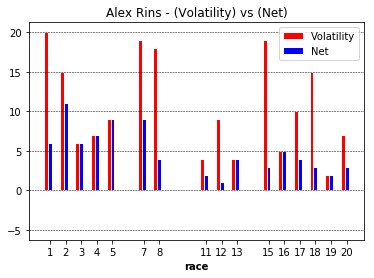

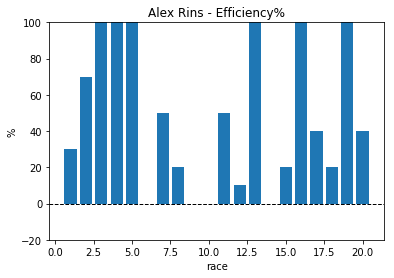

In [22]:
import matplotlib.pyplot as plt
# set bar width
barWidth = 0.25
# set height of bar
bars1 = Rins_2019['Volatility']
bars2 = Rins_2019['Net']
# set position of bar on X axis
r1 = Rins_2019['Order']
r2 = [x+barWidth for x in r1]
# Make the Plot
plt.bar(r1,bars1,color='red',width=barWidth,edgecolor='white',label='Volatility')
plt.bar(r2,bars2,color='blue',width=barWidth,edgecolor='white',label='Net')
# Add xticks on the middle of the group bars
plt.xlabel('race', fontweight='bold')
plt.xticks([r + barWidth for r in r1], r1)
# plot y-threshold dashed line
for i in range(-1,5):
    plt.axhline(y=i*5,linewidth=0.5, color='black',linestyle='--')
# Create legend & Show graphic
plt.legend(loc="upper right")
plt.title("Alex Rins - (Volatility) vs (Net)")
plt.show()

# barplot - efficiency
plt.bar(r1, Rins_2019['Efficiency']*100)
plt.title("Alex Rins - Efficiency%")
plt.axhline(y=0,linewidth=1, color='black',linestyle='--')
plt.ylim(-20,100)
plt.ylabel('%')
plt.xlabel('race')
plt.show()

## 2. Efficiency Trajectory

In [23]:
# a list of circuits in time order
###********************************************************************************
#2015
A_0 = ['Qatar','Argentina','America','Jerez','France','Mugello',
     'Catalunya','Assen','Sachsenring','Indiana','Czechia','Silverstone',
    'Misano','Aragon','Japan','Phillip','Sepang','Valencian']
B_0 = list(range(1,len(A_0)+1))
Order_0 = dict(zip(A_0,B_0))
###********************************************************************************

# 2016-2017
A_1 = ['Qatar','Argentina','America','Jerez','France','Mugello',
     'Catalunya','Assen','Sachsenring','Czechia','Osterreich','Silverstone',
    'Misano','Aragon','Japan','Phillip','Sepang','Valencian']
B_1 = list(range(1,len(A_1)+1))
Order_1 = dict(zip(A_1,B_1))

###********************************************************************************
# 2018-2019
A_2 = ['Qatar','Argentina','America','Jerez','France','Mugello',
     'Catalunya','Assen','Sachsenring','Czechia','Osterreich','Silverstone',
    'Misano','Aragon','Chang','Japan','Phillip','Sepang','Valencian']
B_2 = list(range(1,len(A_2)+1))
Order_2 = dict(zip(A_2,B_2))
###********************************************************************************

### 2.1 Compare all 22 riders' trajectories within each year (15 - 19)

YEAR = 2015 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


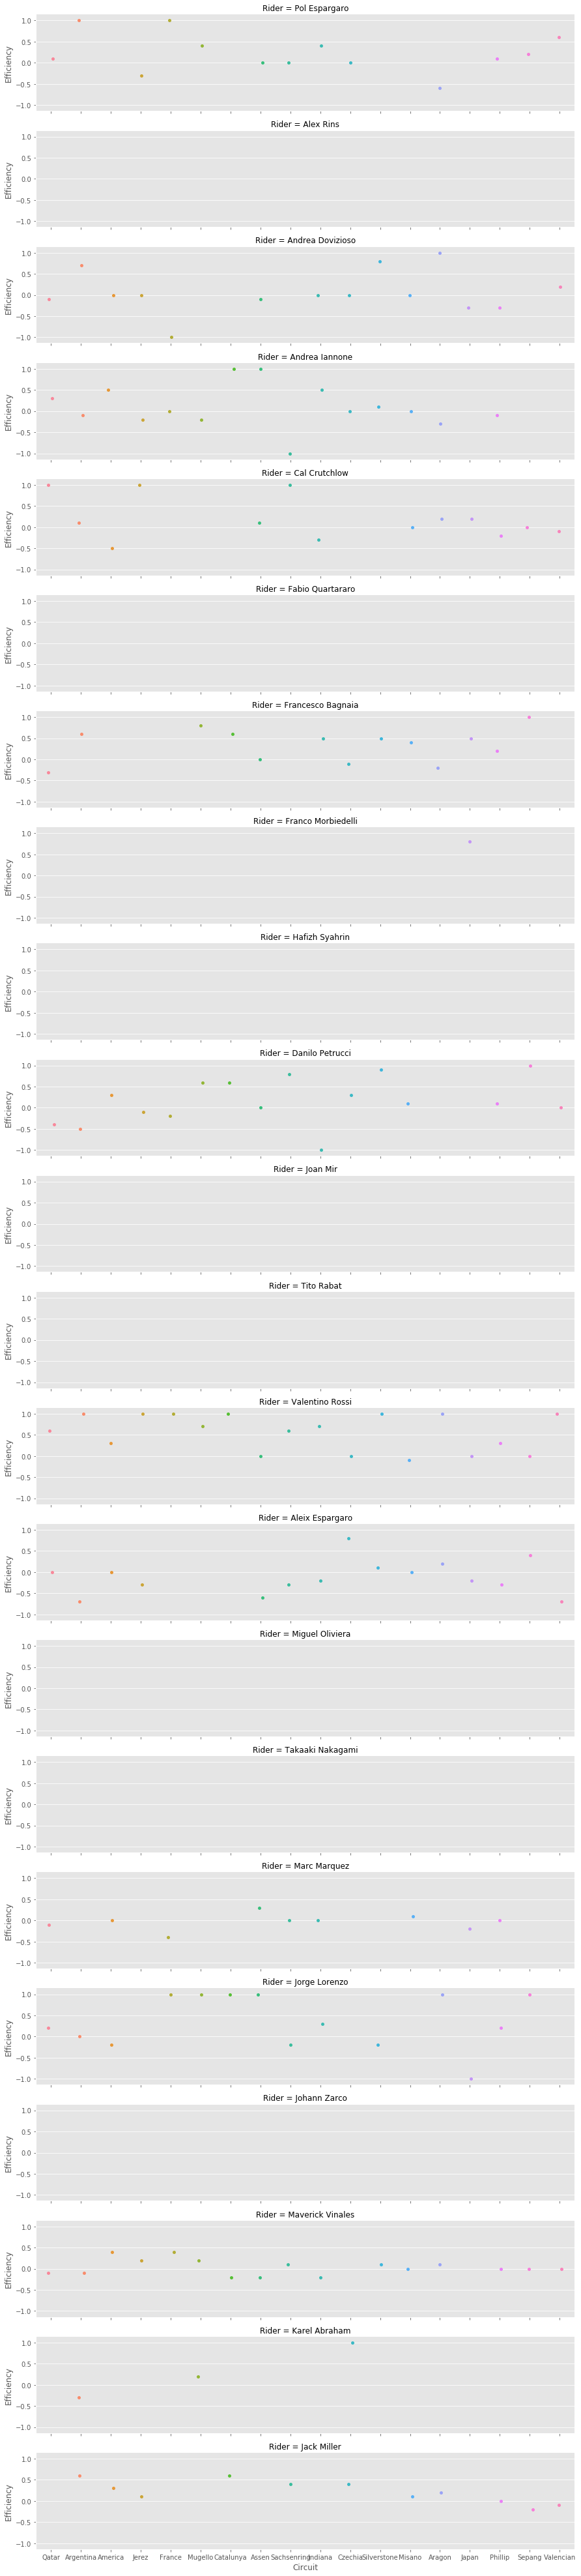

YEAR = 2016 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


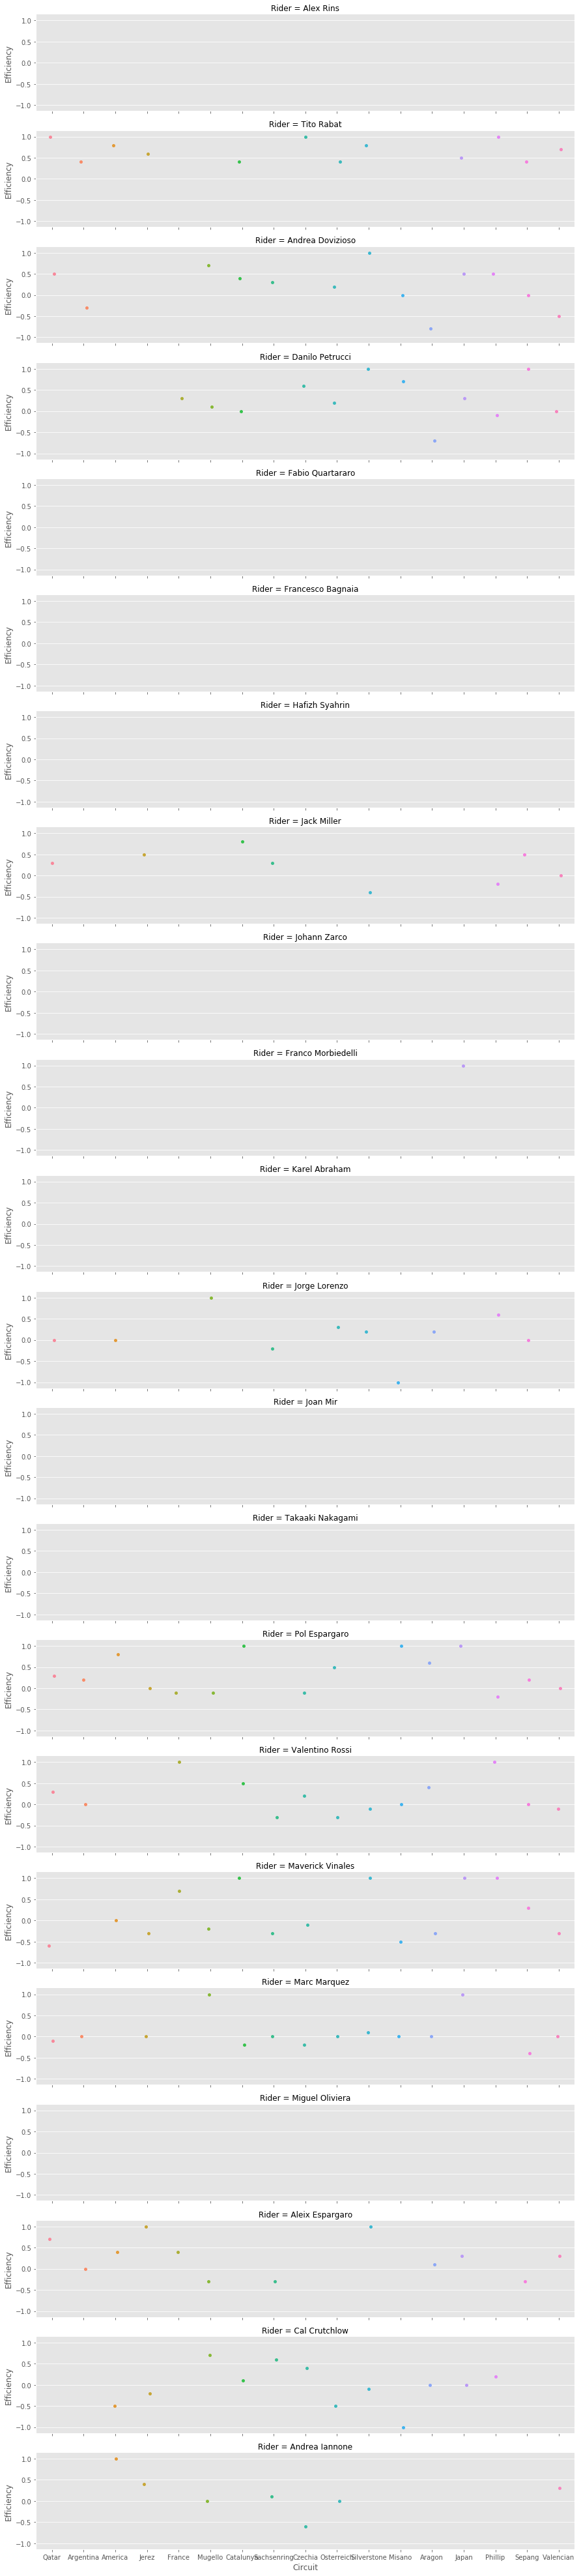

YEAR = 2017 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


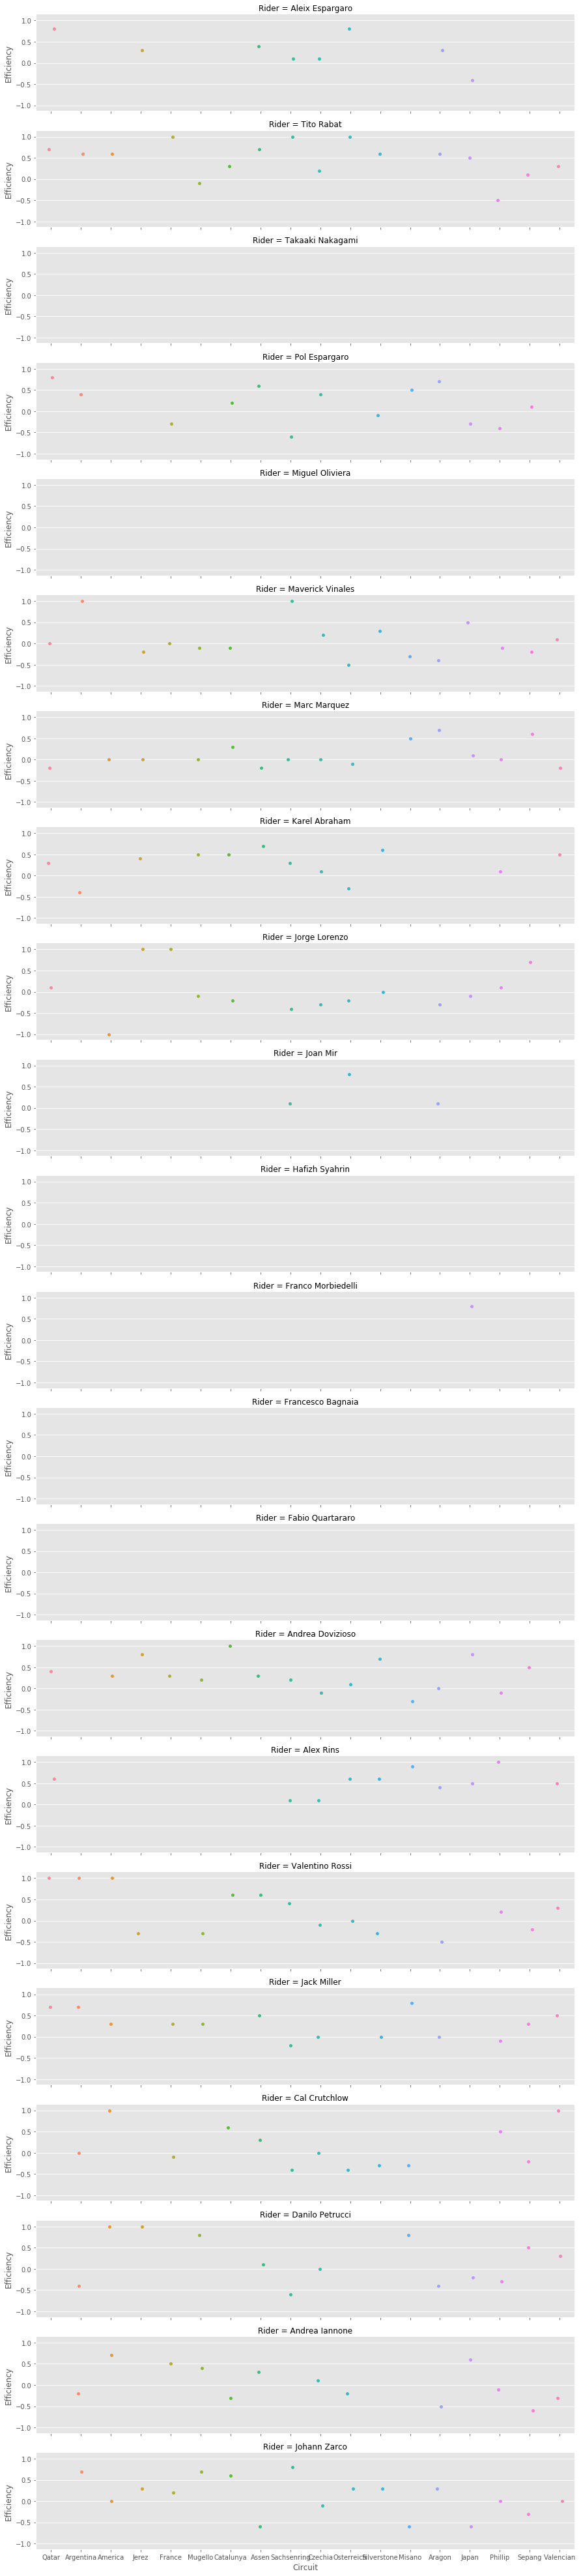

YEAR = 2018 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


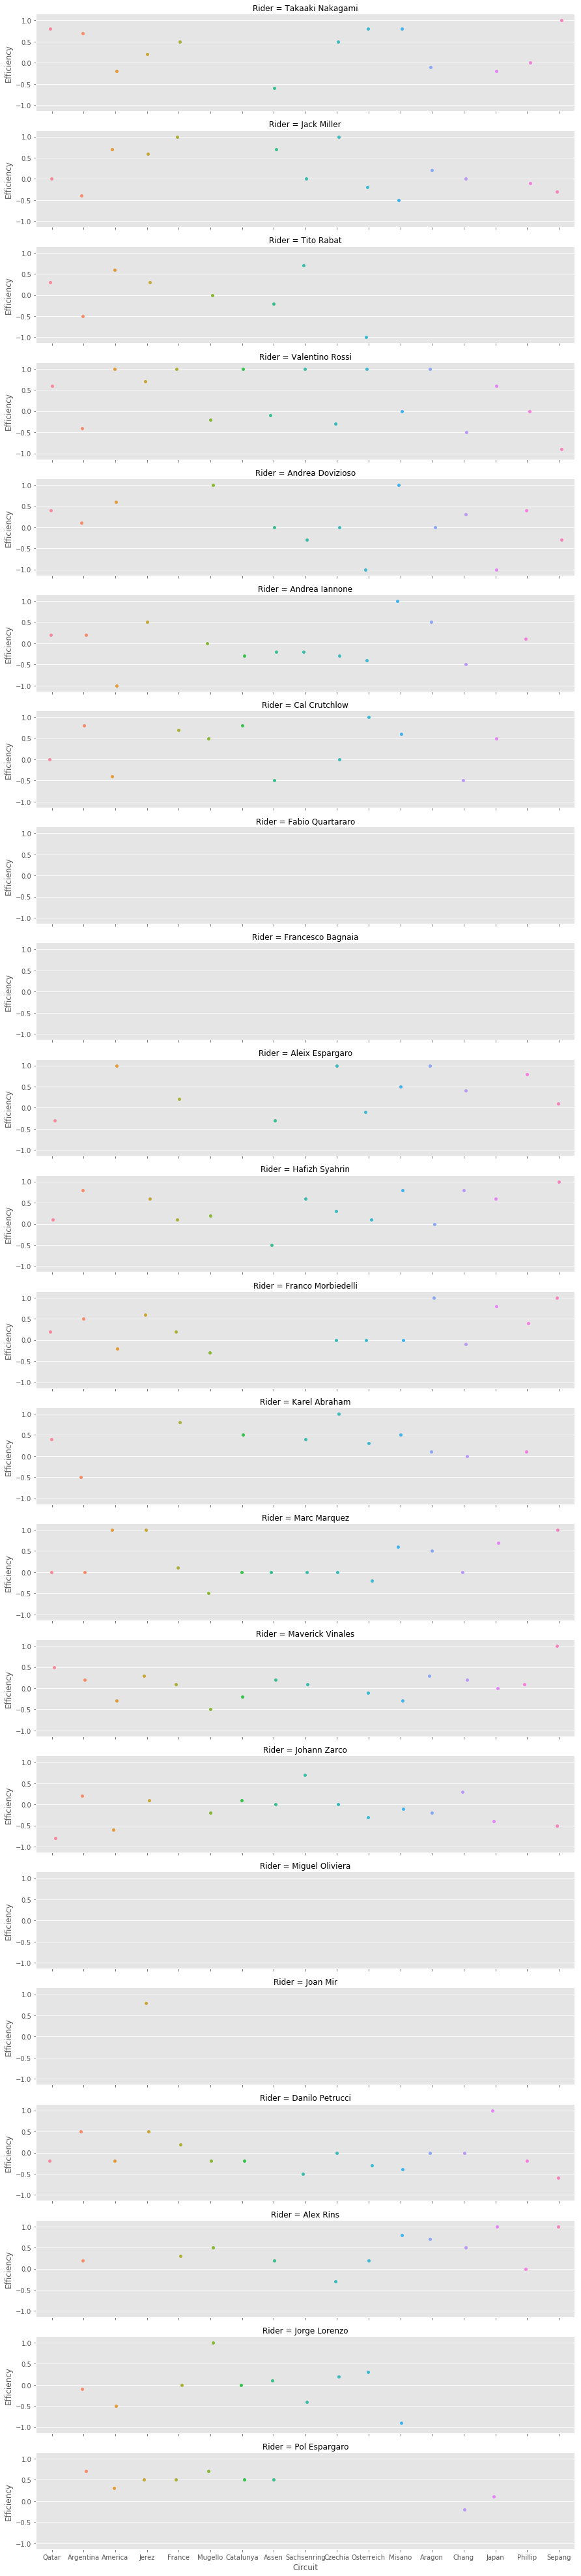

YEAR = 2019 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


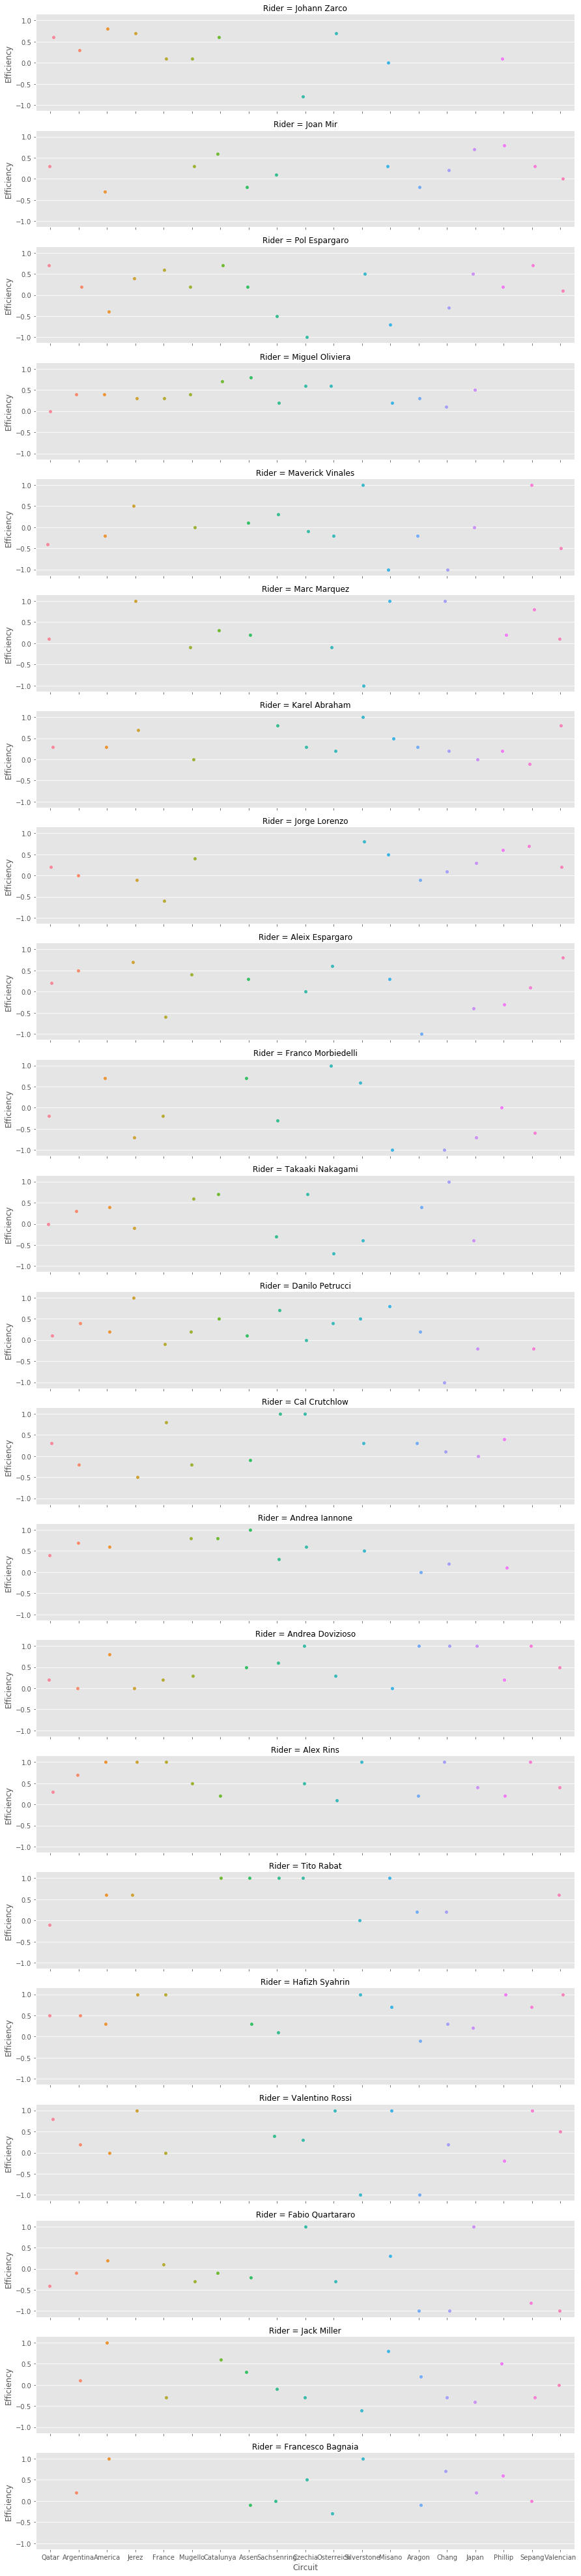

In [24]:
import seaborn as sns
import copy
import warnings
warnings.filterwarnings('ignore')

for i in ['2015','2016','2017','2018','2019']:
    # print header info, sep by "-----"
    print("YEAR =", i ,'\n',"-"*100,'\n',"-"*100)
    abc = big_table[(big_table['Year']==i)&(big_table['Grid']!=2222)]
    
    # choose the right circuit_order list
    if i == '2015':
        Order = copy.copy(Order_0)
    elif i in ['2016','2017']:
        Order = copy.copy(Order_1)
    elif i in ['2018','2019']: 
        Order = copy.copy(Order_2)
    
    # data prep
    abc['Order'] = [Order[x] for x in list(abc['Circuit'])]
    abc = abc.sort_values('Order')
    
    # plot graph
    plt.style.use('ggplot')
    g = sns.catplot(x="Circuit", y="Efficiency",
                    col="Rider", col_wrap=1, data=abc,
                    height=2.5, aspect=5)
    plt.show()

### 2.2 Compare each rider's efficiency trajectory from year to year (15-19)

Rider = Aleix Espargaro 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


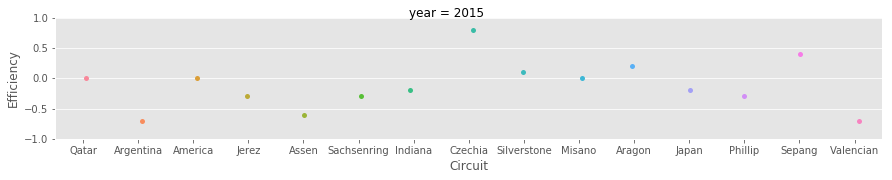

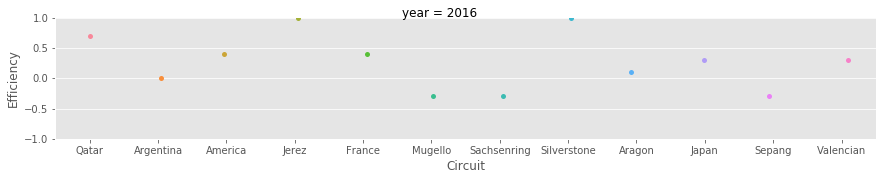

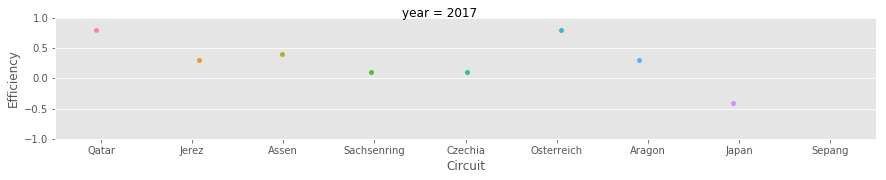

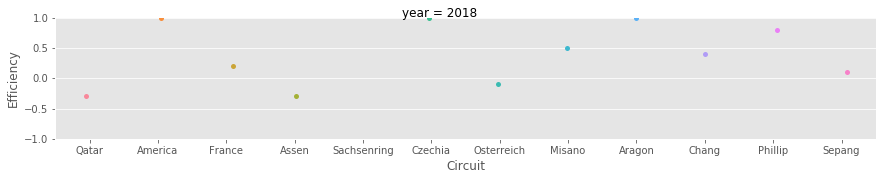

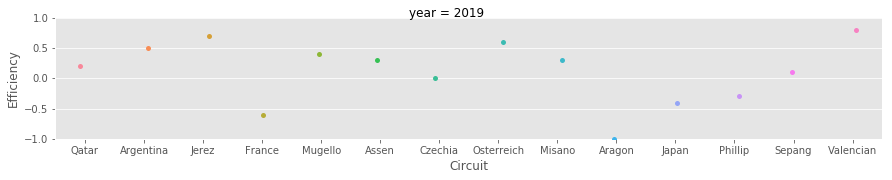

Rider = Alex Rins 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


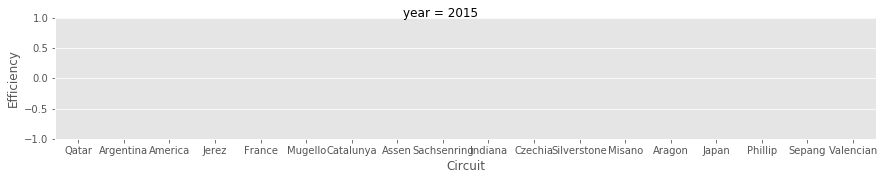

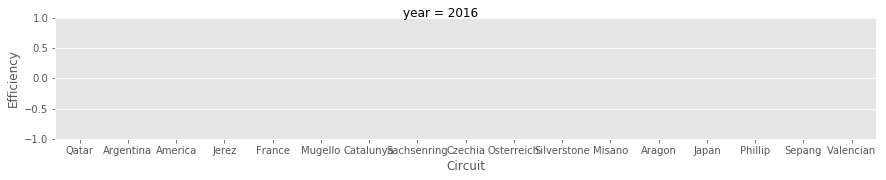

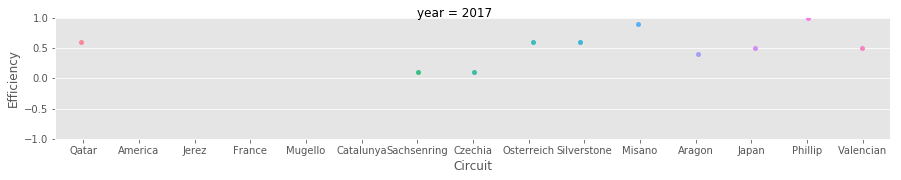

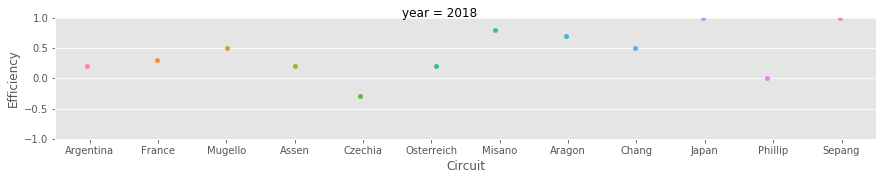

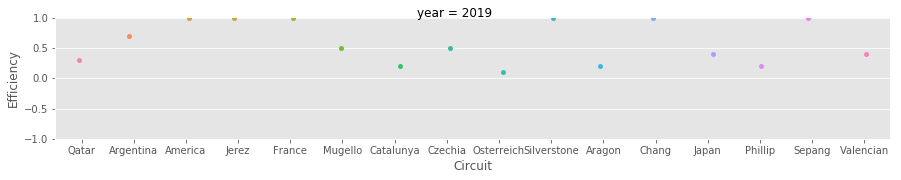

Rider = Andrea Dovizioso 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


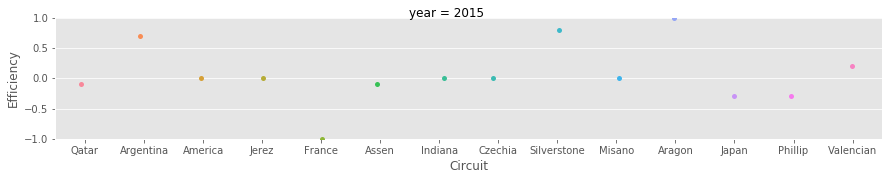

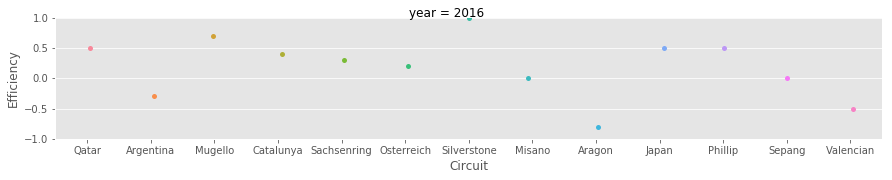

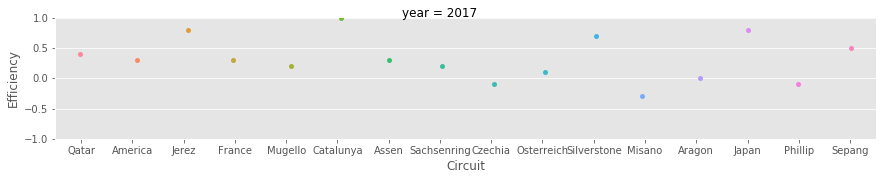

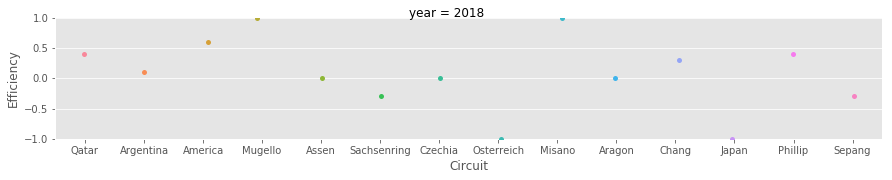

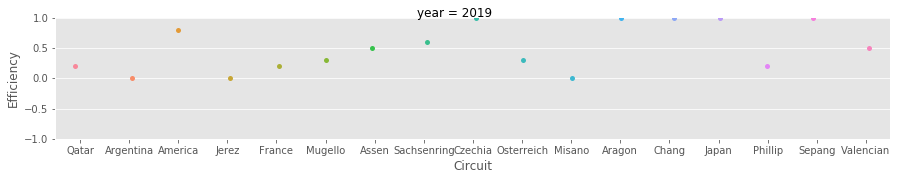

Rider = Andrea Iannone 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


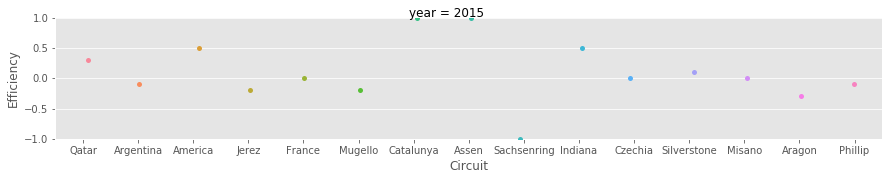

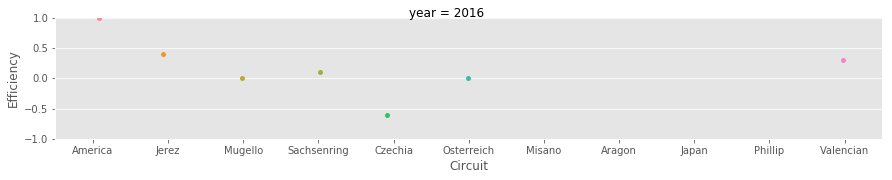

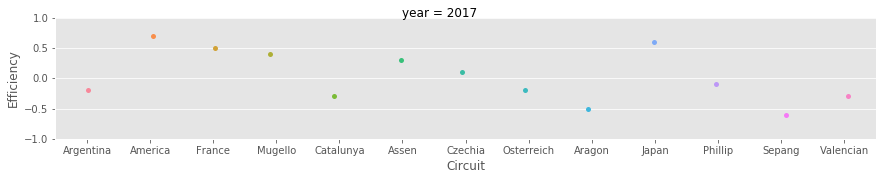

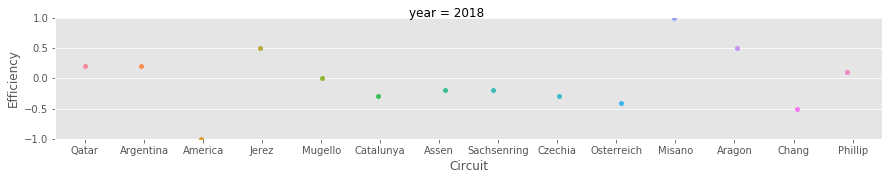

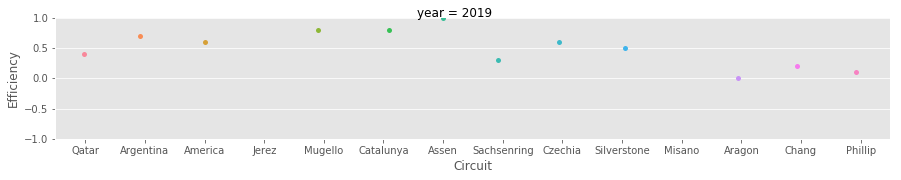

Rider = Cal Crutchlow 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


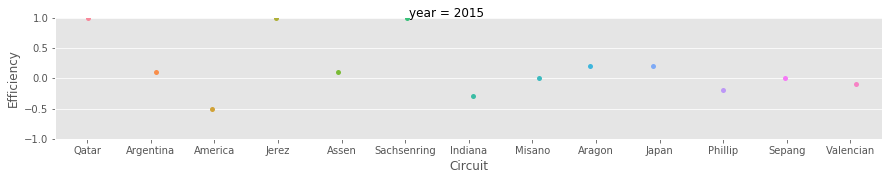

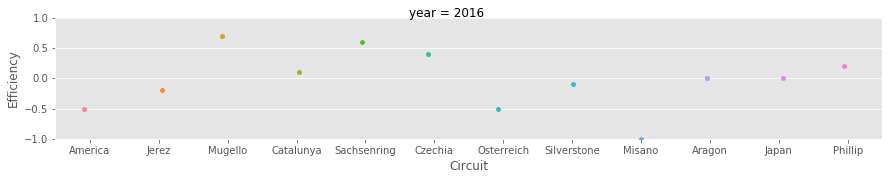

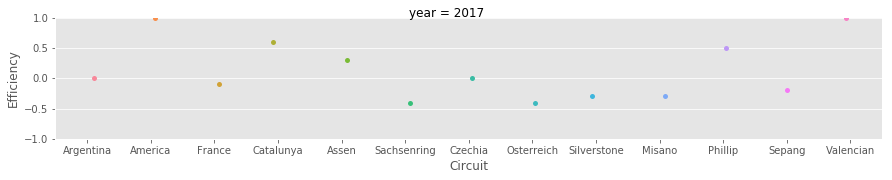

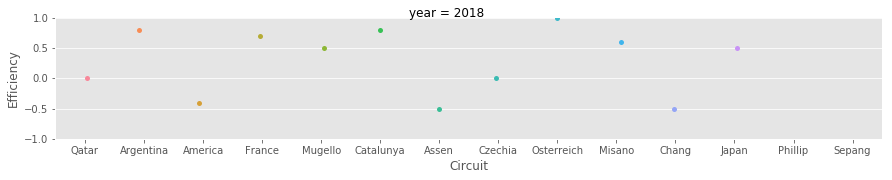

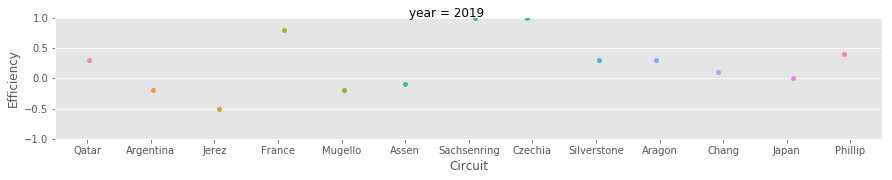

Rider = Danilo Petrucci 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


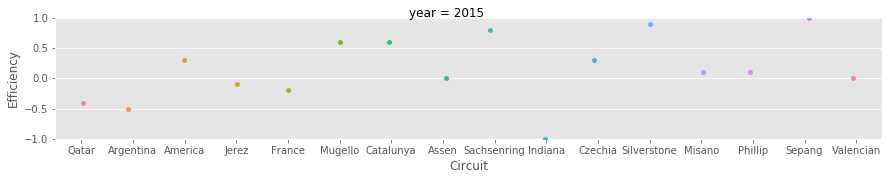

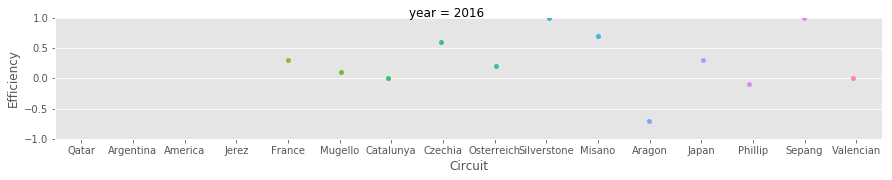

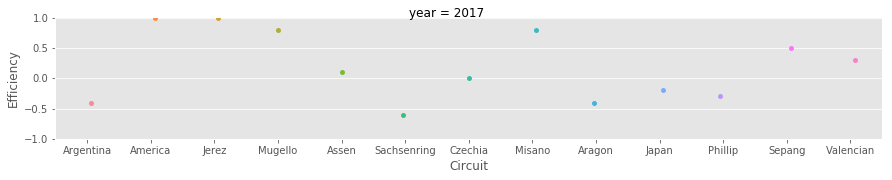

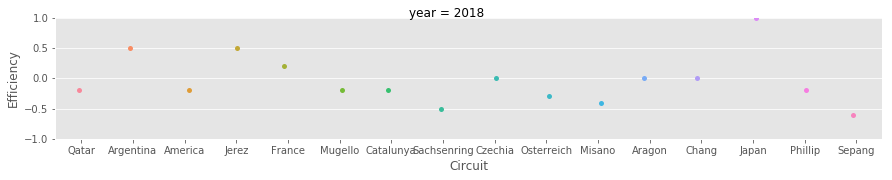

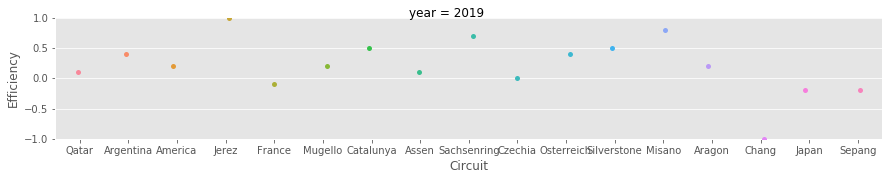

Rider = Fabio Quartararo 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


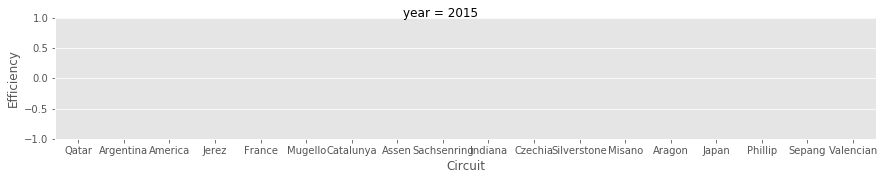

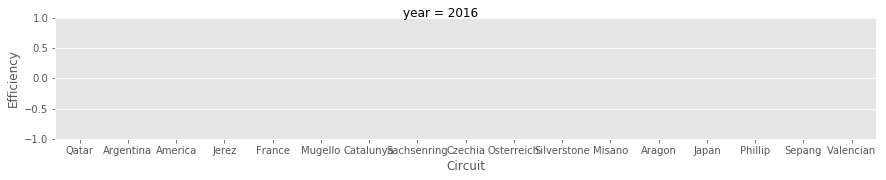

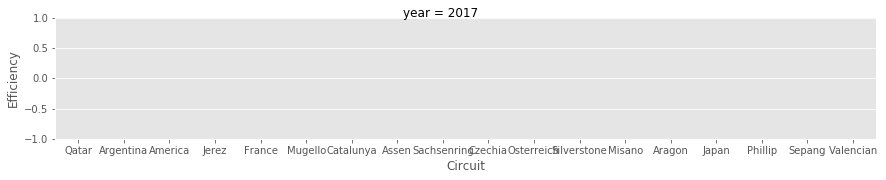

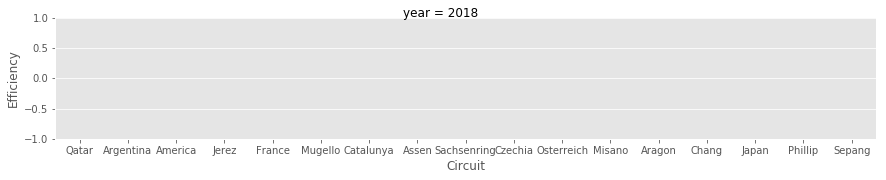

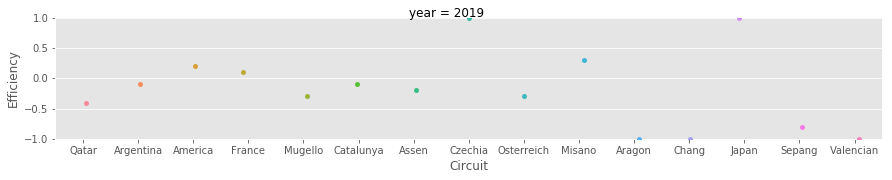

Rider = Francesco Bagnaia 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


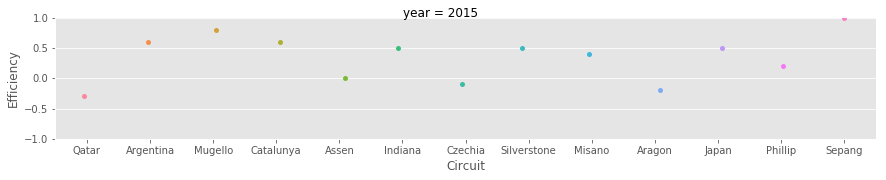

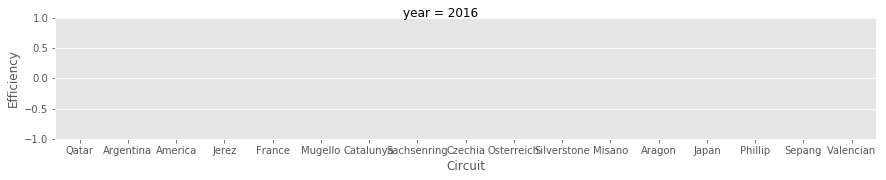

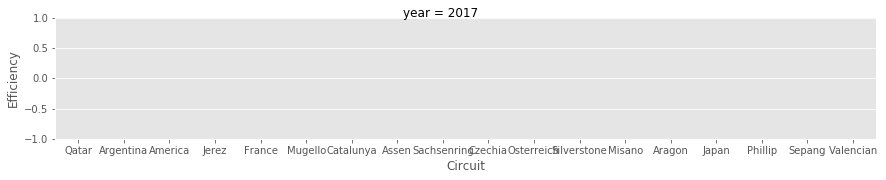

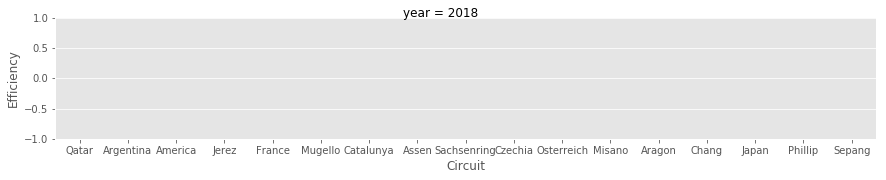

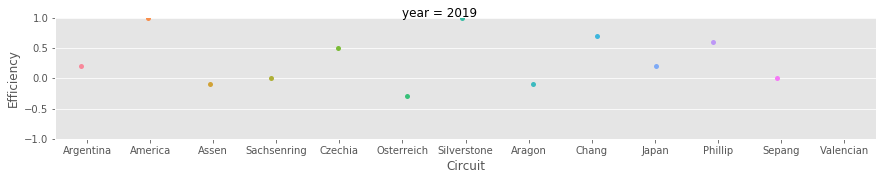

Rider = Franco Morbiedelli 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


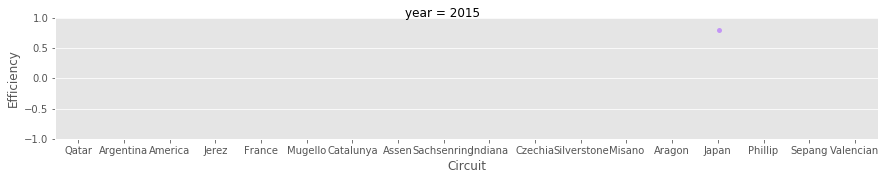

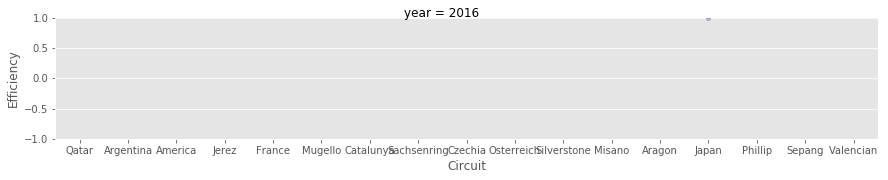

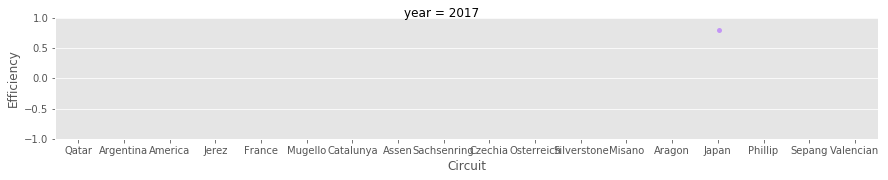

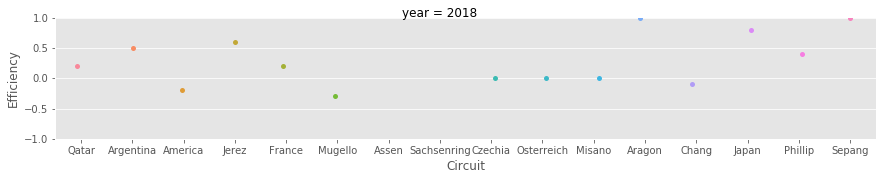

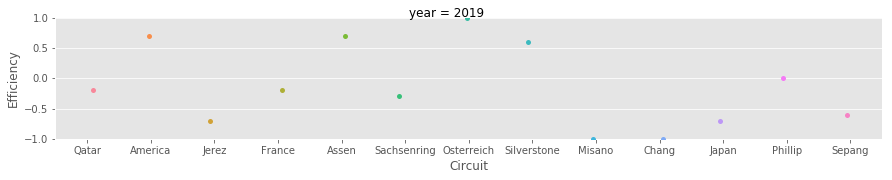

Rider = Hafizh Syahrin 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


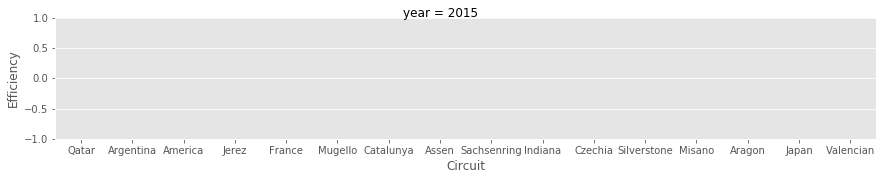

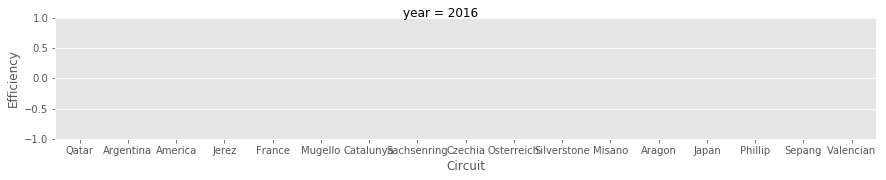

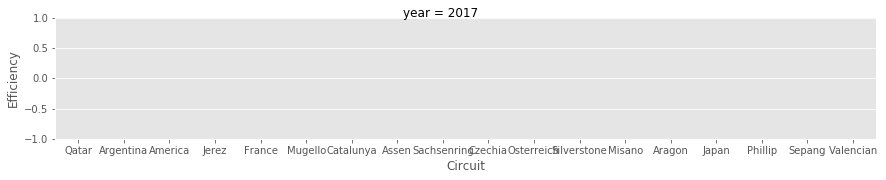

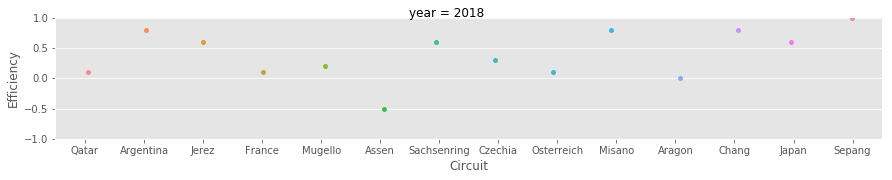

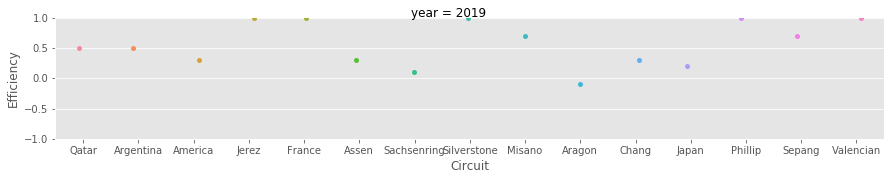

Rider = Jack Miller 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


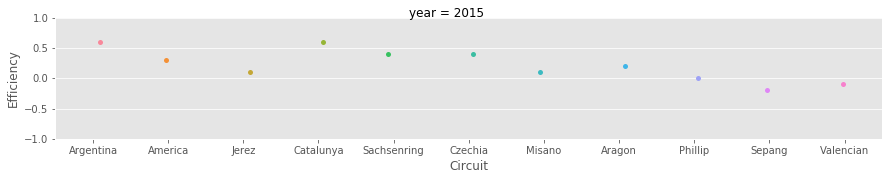

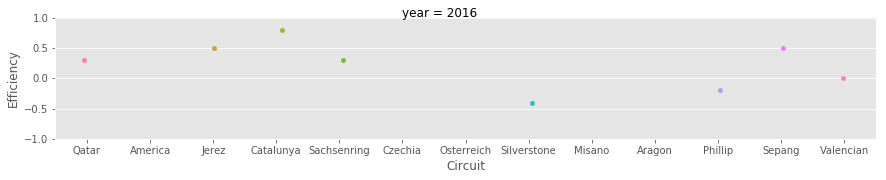

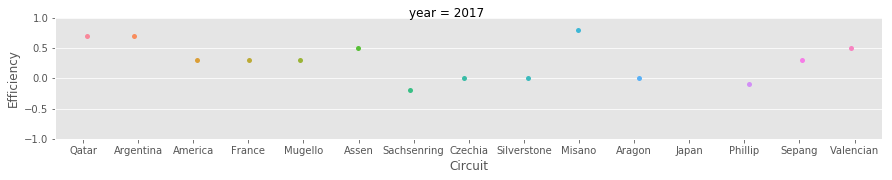

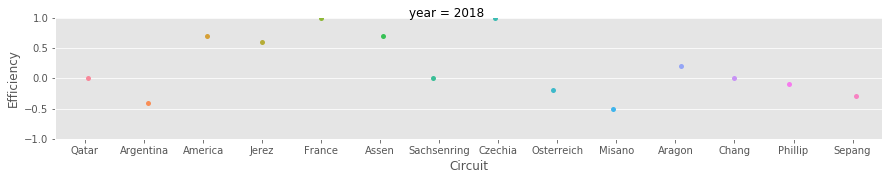

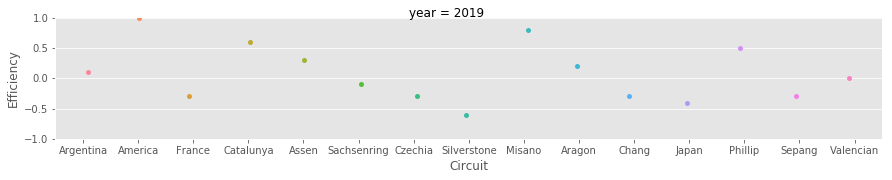

Rider = Joan Mir 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


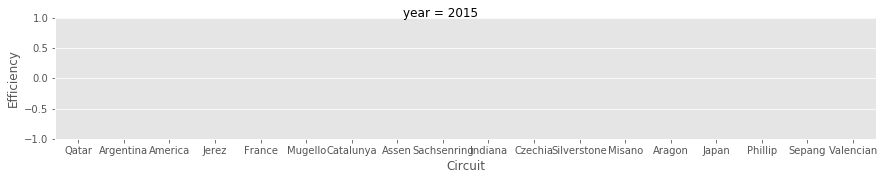

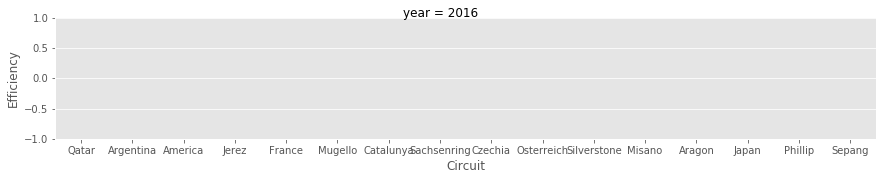

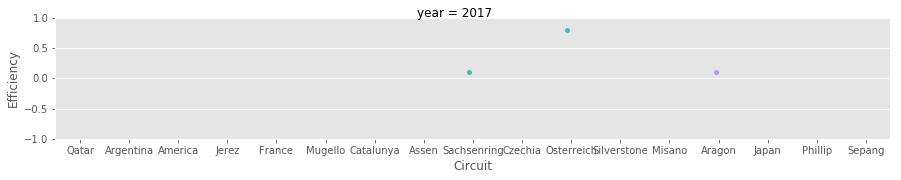

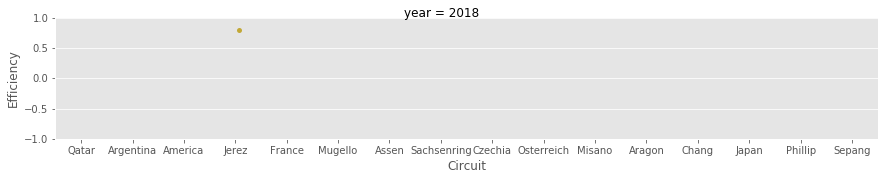

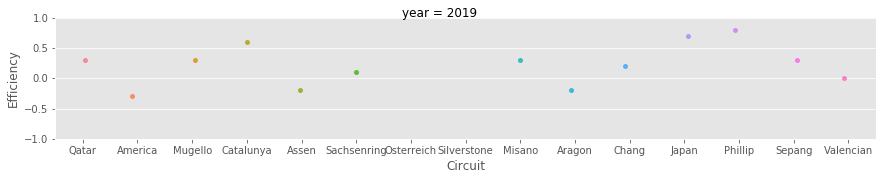

Rider = Johann Zarco 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


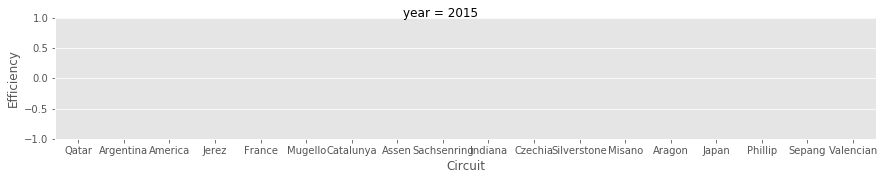

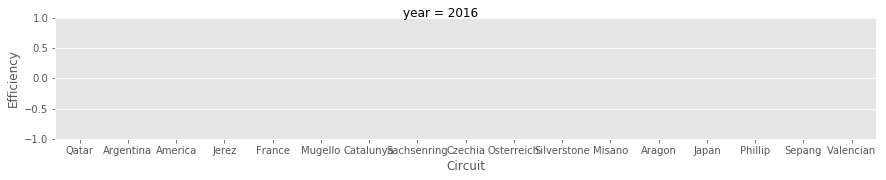

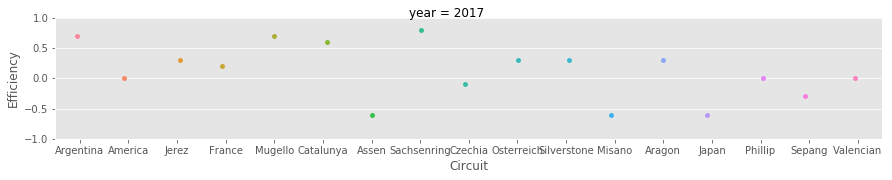

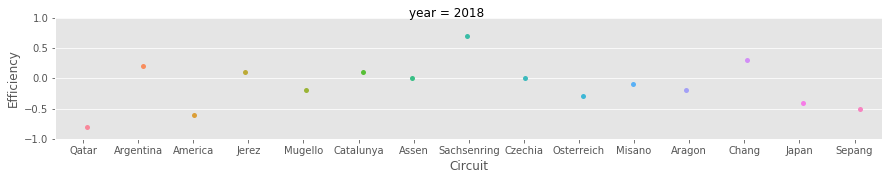

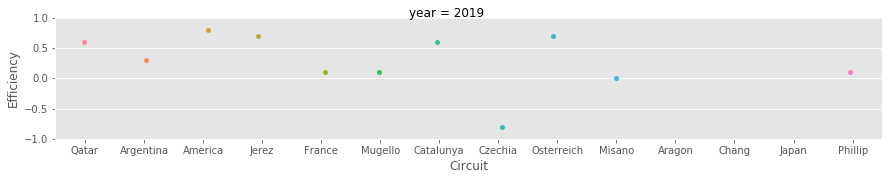

Rider = Jorge Lorenzo 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


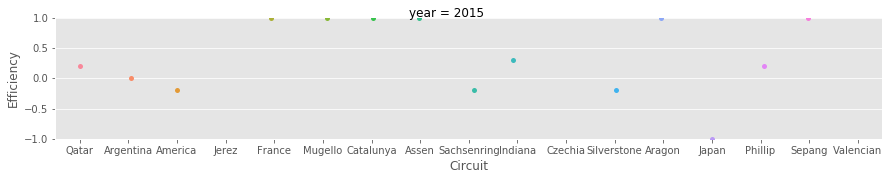

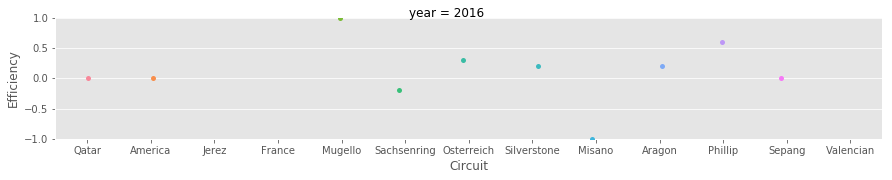

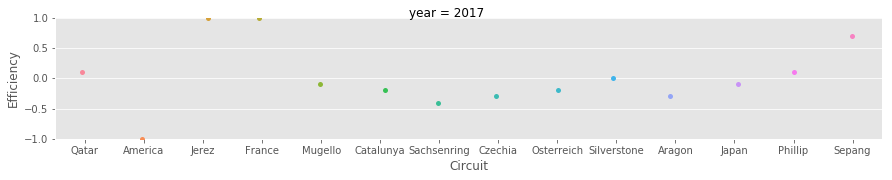

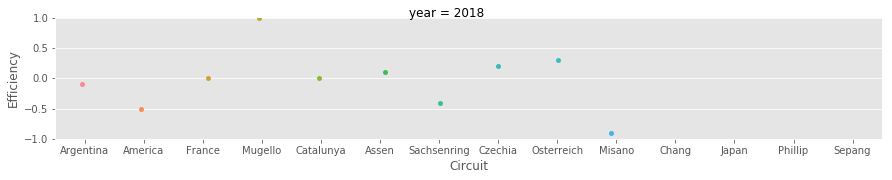

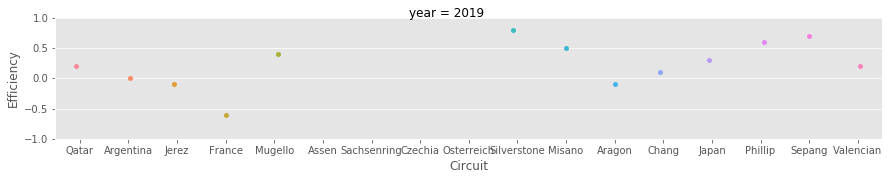

Rider = Karel Abraham 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


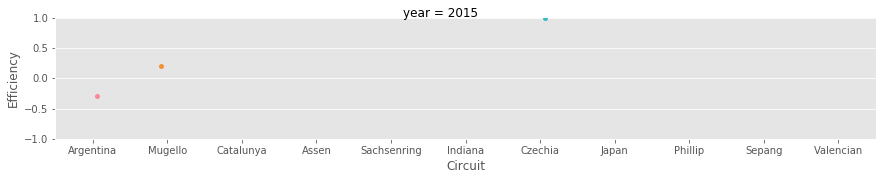

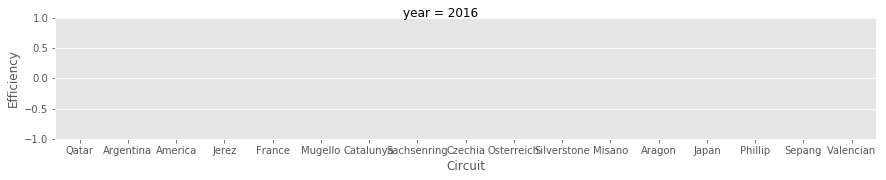

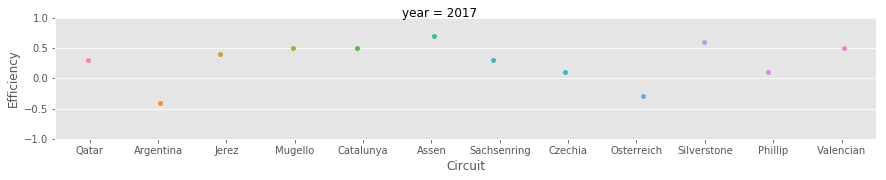

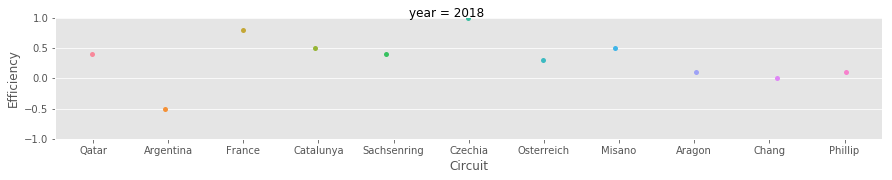

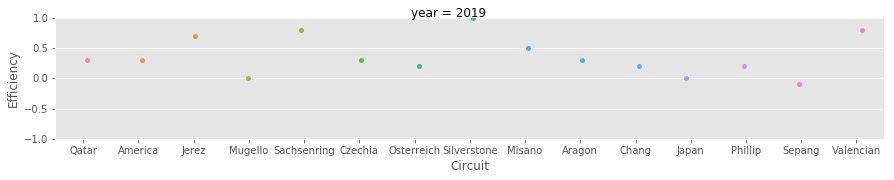

Rider = Marc Marquez 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


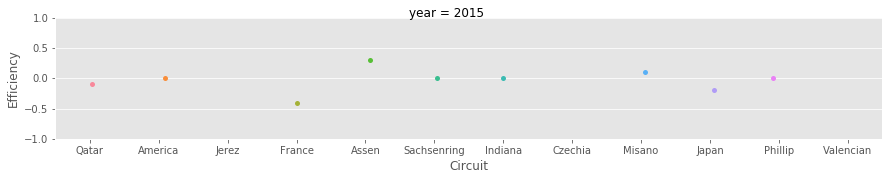

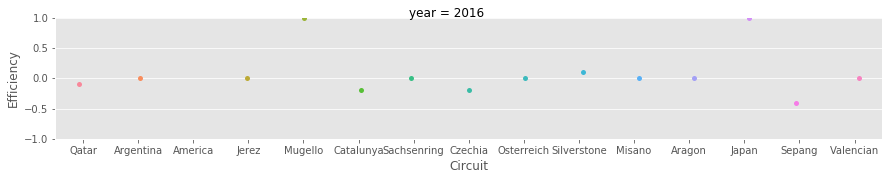

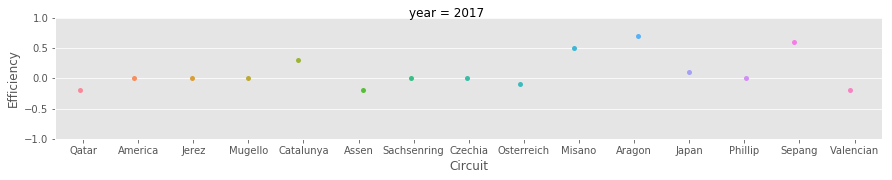

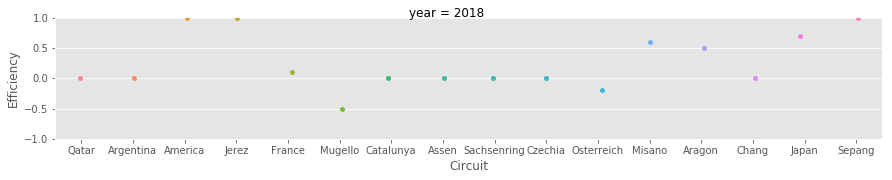

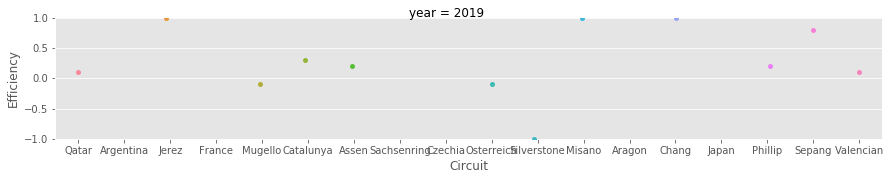

Rider = Maverick Vinales 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


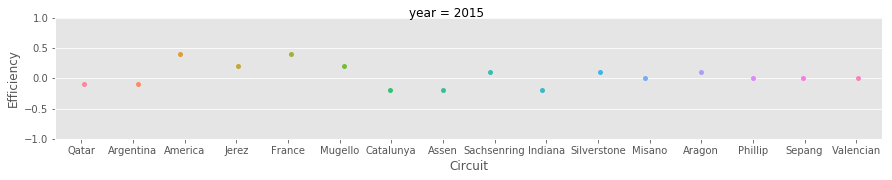

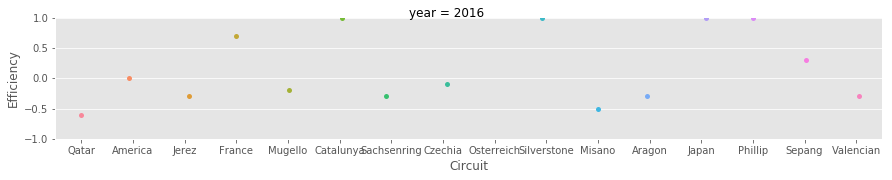

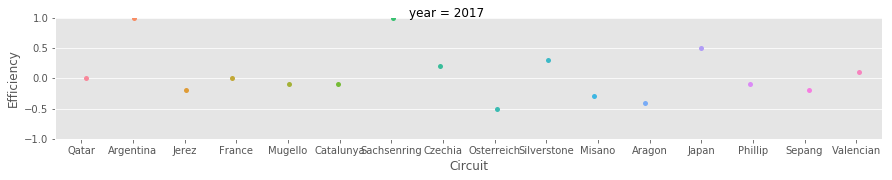

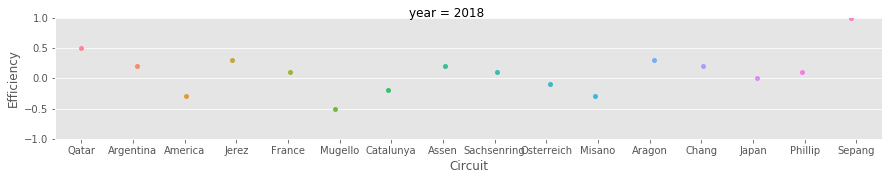

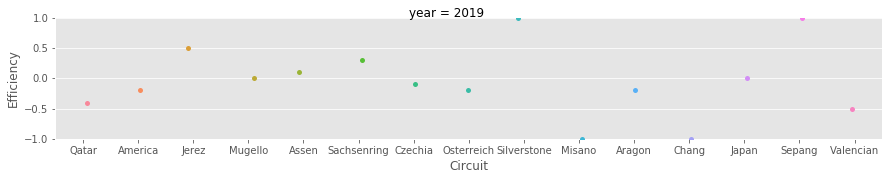

Rider = Miguel Oliviera 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


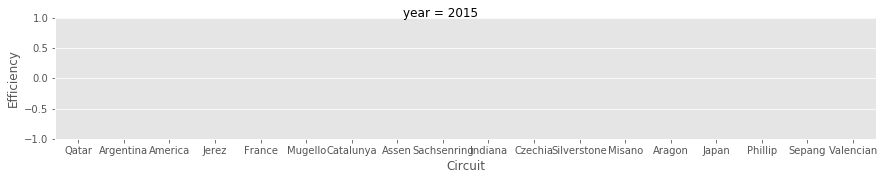

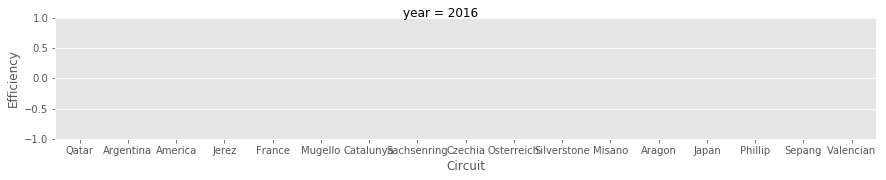

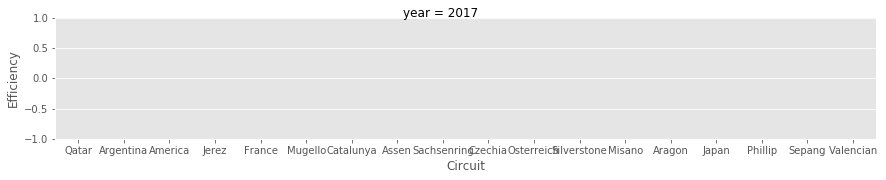

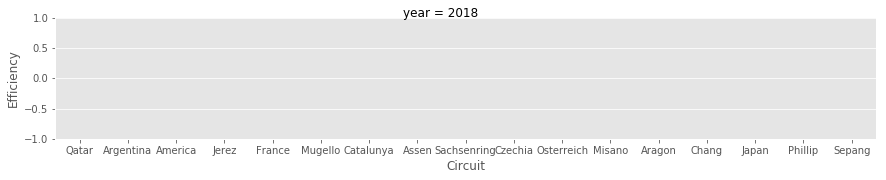

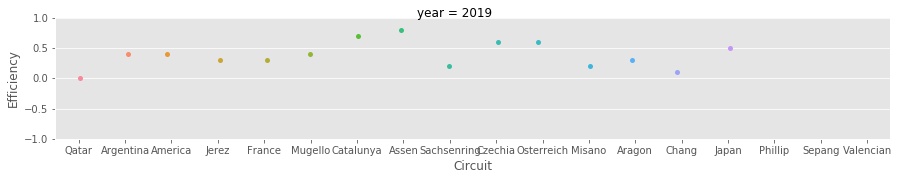

Rider = Pol Espargaro 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


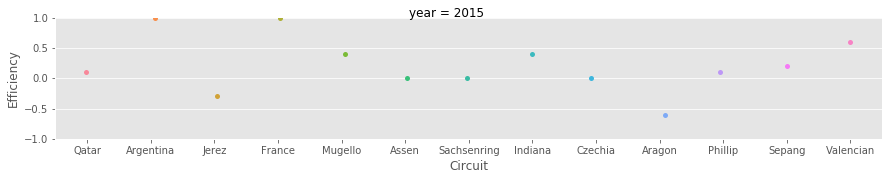

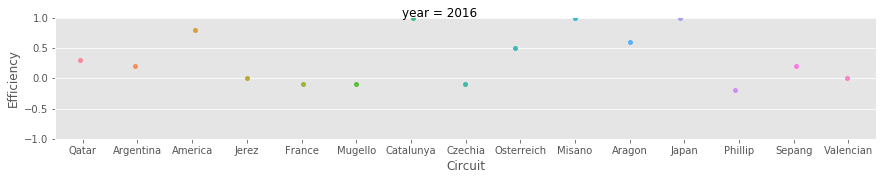

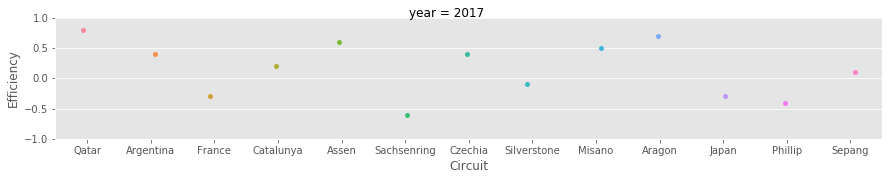

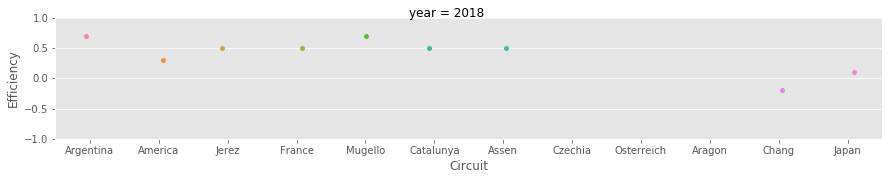

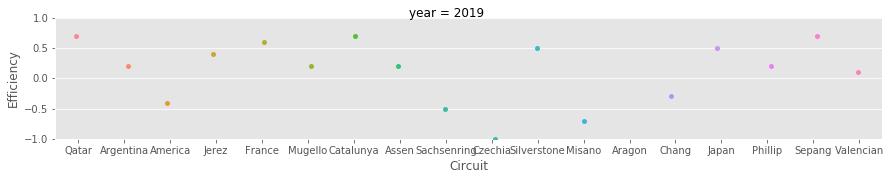

Rider = Takaaki Nakagami 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


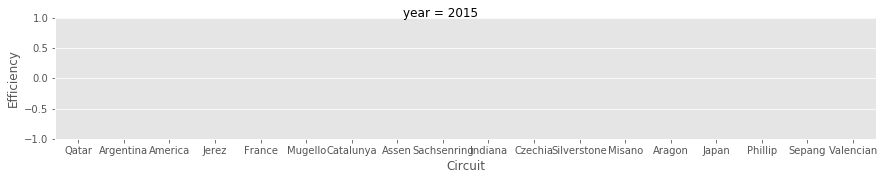

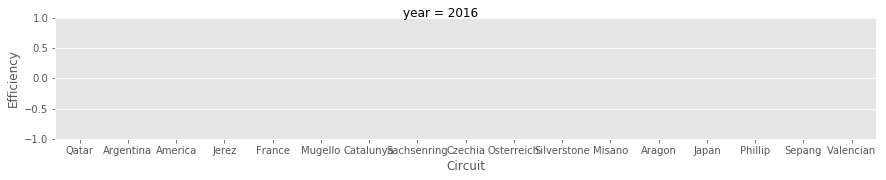

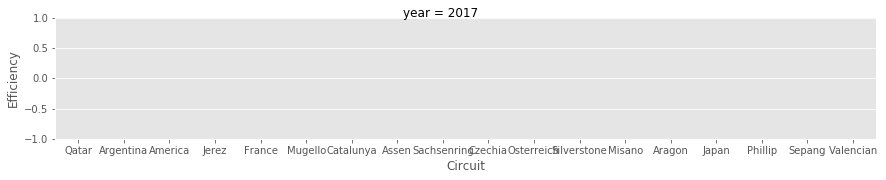

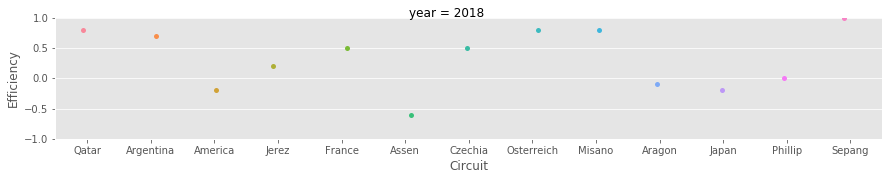

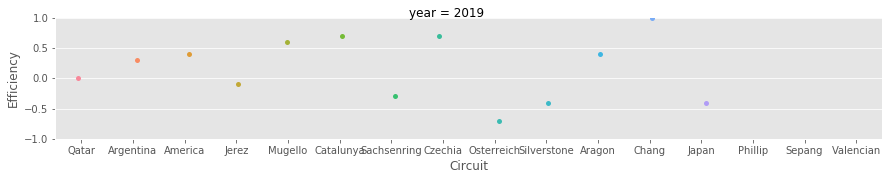

Rider = Tito Rabat 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


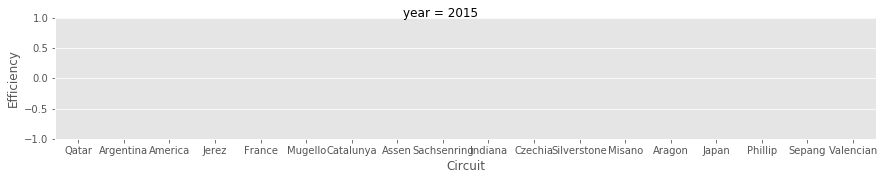

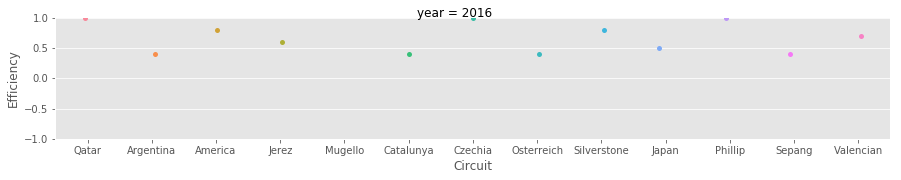

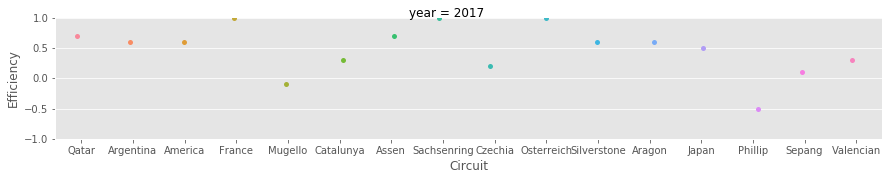

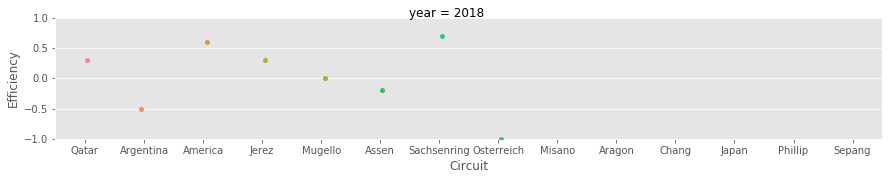

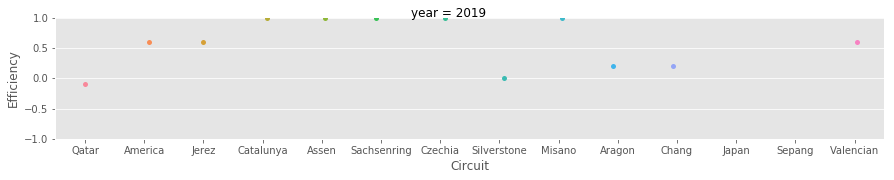

Rider = Valentino Rossi 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------


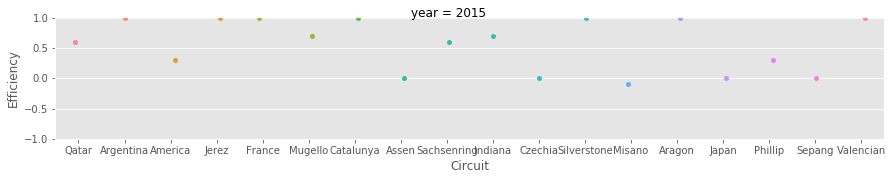

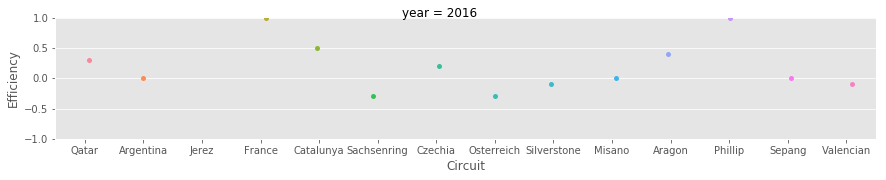

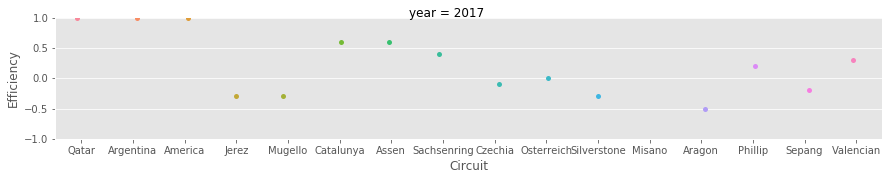

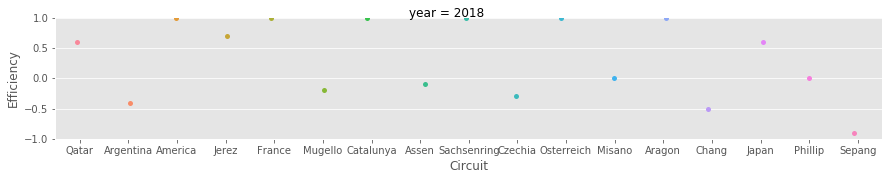

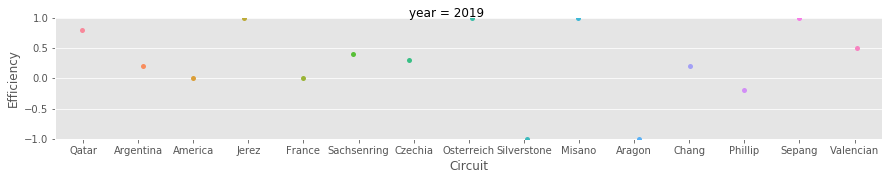

In [25]:
import seaborn as sns
import copy
import warnings
warnings.filterwarnings('ignore')

for j in rider_names:
    # print header info, sep by "-----"
    print("Rider =", j ,'\n',"-"*100,'\n',"-"*100)
    abc = big_table[(big_table['Rider']==j)&(big_table['Grid']!=2222)]
    
    ###********************************************************************************
    # data prep - 2015
    abc_2015 = abc[abc['Year']=='2015']
    abc_2015['Order'] = [Order_0[x] for x in list(abc_2015['Circuit'])]
    abc_2015 = abc_2015.sort_values('Order')
    
    # plot graph - 2015
    plt.style.use('ggplot')
    g = sns.catplot(x="Circuit", y="Efficiency", data=abc_2015, height=2.5, aspect=5)
    g.set(ylim=(-1, 1))
    g.fig.suptitle("year = 2015")
    ###********************************************************************************
    
    # data prep - 2016
    abc_2016 = abc[abc['Year']=='2016']
    abc_2016['Order'] = [Order_1[x] for x in list(abc_2016['Circuit'])]
    abc_2016 = abc_2016.sort_values('Order')
    
    # plot graph - 2016
    plt.style.use('ggplot')
    g = sns.catplot(x="Circuit", y="Efficiency", data=abc_2016, height=2.5, aspect=5)
    g.set(ylim=(-1, 1))
    g.fig.suptitle("year = 2016")
    ###********************************************************************************
    
    # data prep - 2017
    abc_2017 = abc[abc['Year']=='2017']
    abc_2017['Order'] = [Order_1[x] for x in list(abc_2017['Circuit'])]
    abc_2017 = abc_2017.sort_values('Order')
    
    
    # plot graph - 2017
    plt.style.use('ggplot')
    g = sns.catplot(x="Circuit", y="Efficiency", data=abc_2017, height=2.5, aspect=5)
    g.set(ylim=(-1, 1))
    g.fig.suptitle("year = 2017")
    ###********************************************************************************
    
    # data prep - 2018
    abc_2018 = abc[abc['Year']=='2018']
    abc_2018['Order'] = [Order_2[x] for x in list(abc_2018['Circuit'])]
    abc_2018 = abc_2018.sort_values('Order')
    
    # plot graph - 2018
    plt.style.use('ggplot')
    g = sns.catplot(x="Circuit", y="Efficiency", data=abc_2018, height=2.5, aspect=5)
    g.set(ylim=(-1, 1))
    g.fig.suptitle("year = 2018")
    ###********************************************************************************
    
    # data prep - 2019
    abc_2019 = abc[abc['Year']=='2019']
    abc_2019['Order'] = [Order_2[x] for x in list(abc_2019['Circuit'])]
    abc_2019 = abc_2019.sort_values('Order')
    
    # plot graph - 2019
    plt.style.use('ggplot')
    g = sns.catplot(x="Circuit", y="Efficiency", data=abc_2019, height=2.5, aspect=5)
    g.set(ylim=(-1, 1))
    g.fig.suptitle("year = 2019")
    ###********************************************************************************
    
    plt.show()

### 2.3 Jack Miller's performance by track of all years

Text(0.5, 0.98, "Jack Miller's efficiency by track - box plot")

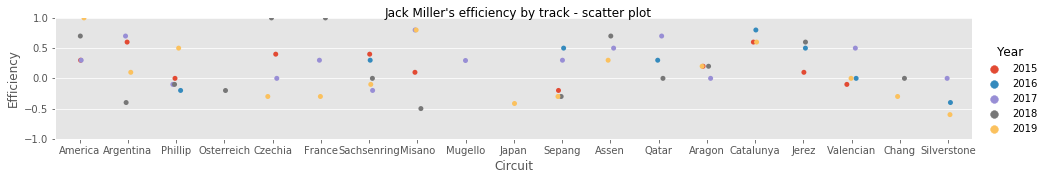

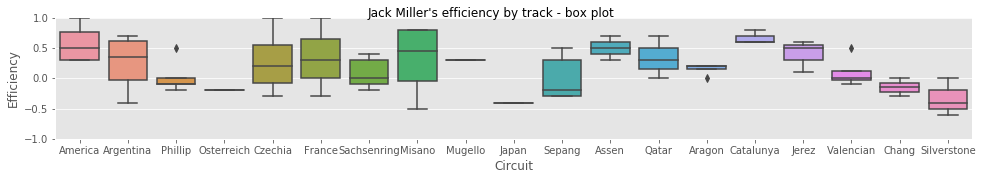

In [52]:
test = big_table[(big_table['Rider']=='Jack Miller')&(big_table['Grid']!=2222)]
g2 = sns.catplot(x="Circuit", y="Efficiency", hue='Year', data=test, height=2.5, aspect=5.5)
g2.set(ylim=(-1, 1))
g2.fig.suptitle("Jack Miller's efficiency by track - scatter plot")

g3 = sns.catplot(x="Circuit", y="Efficiency", kind="box", data=test, height=2.5, aspect=5.5)
g3.set(ylim=(-1, 1))
g3.fig.suptitle("Jack Miller's efficiency by track - box plot")

### 2.4 Graph the scatter/bar plots for all 22 riders

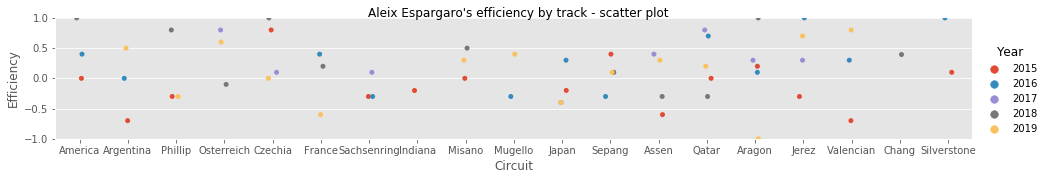

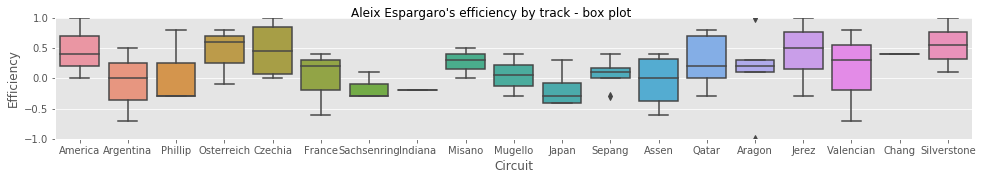

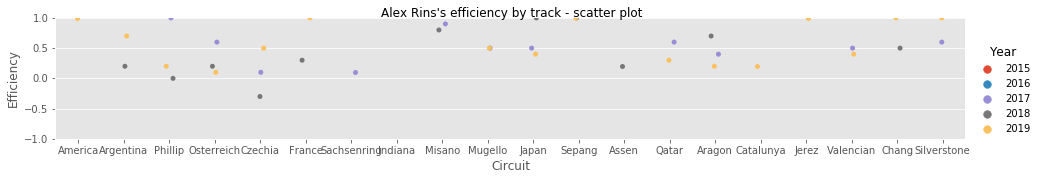

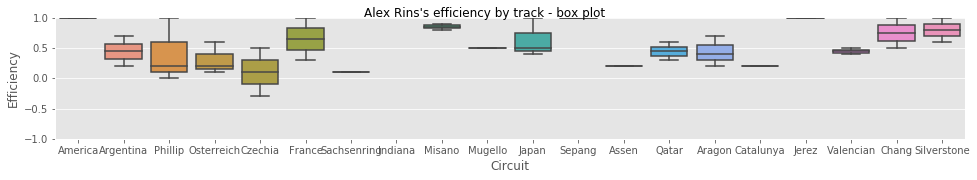

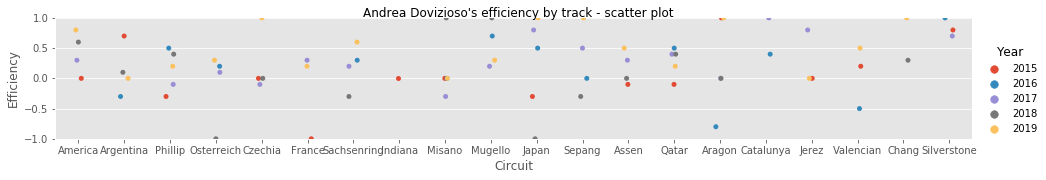

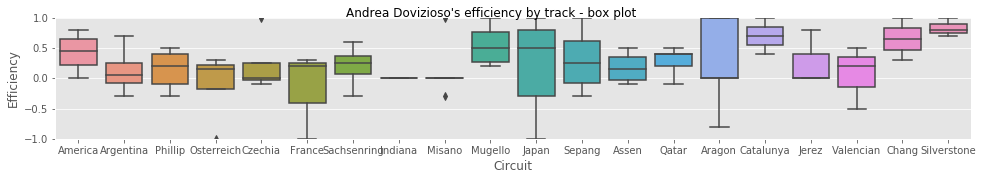

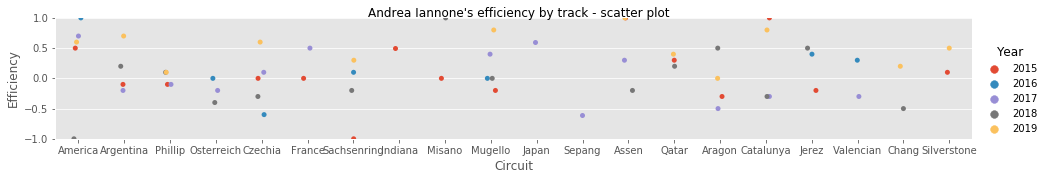

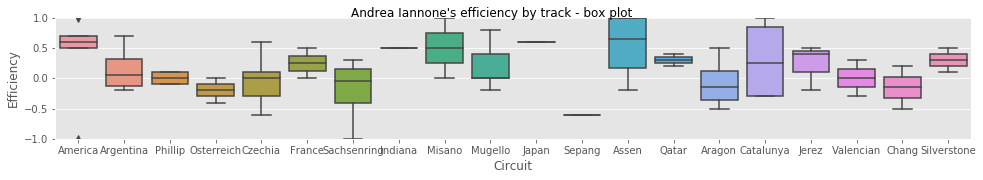

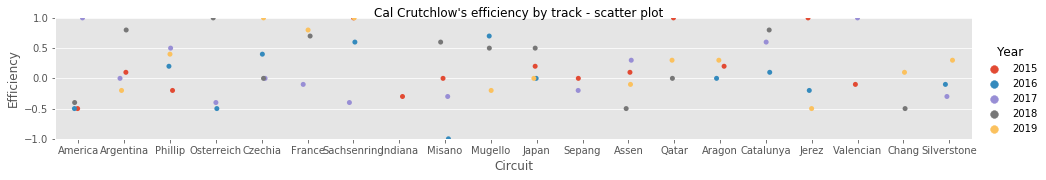

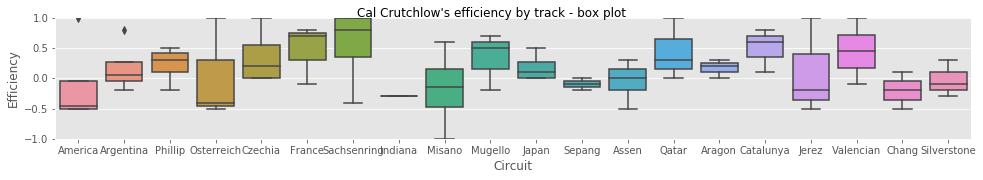

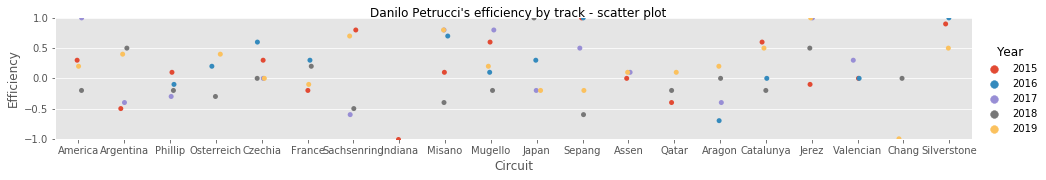

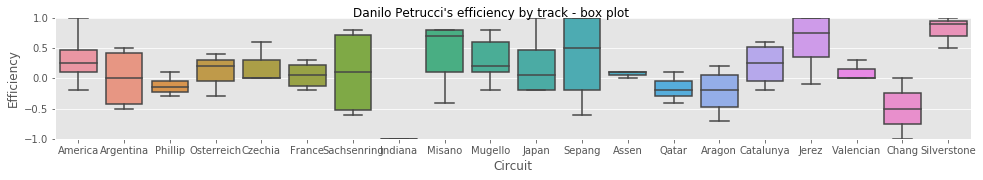

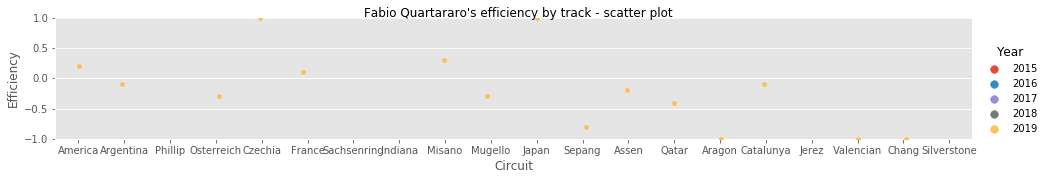

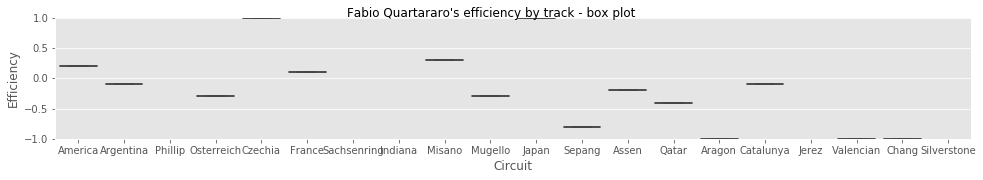

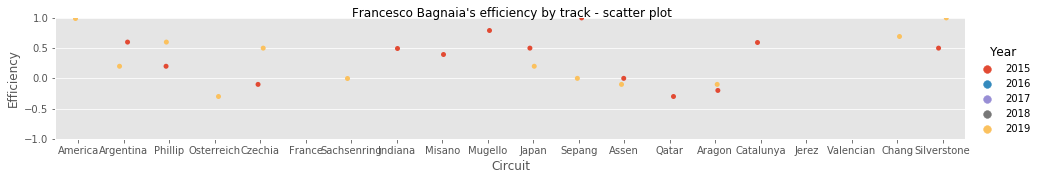

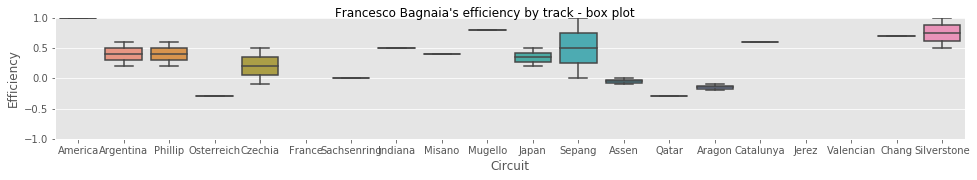

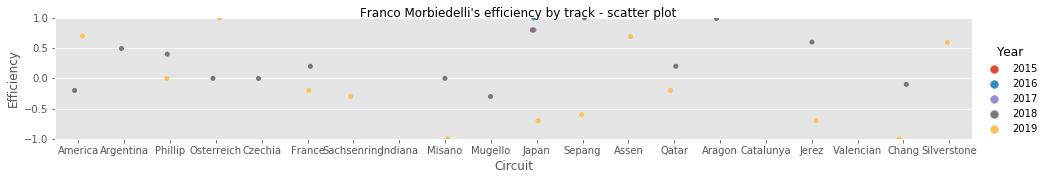

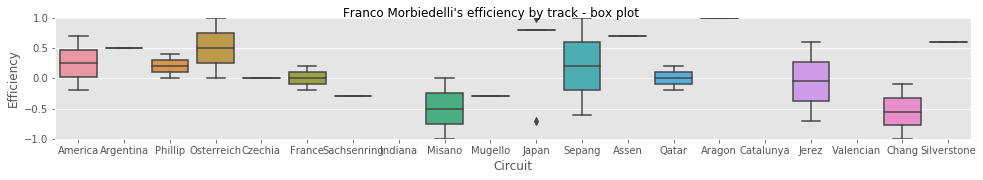

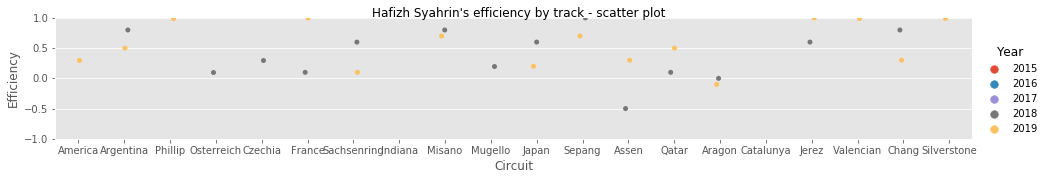

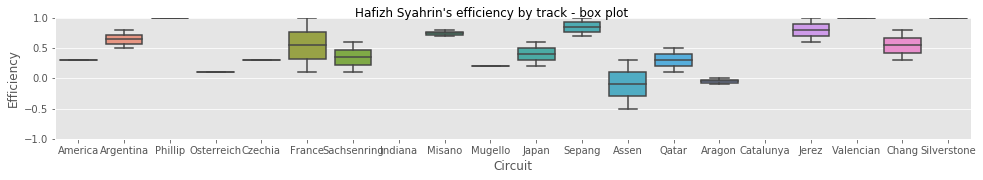

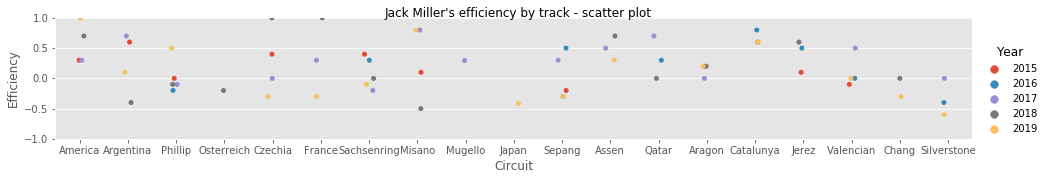

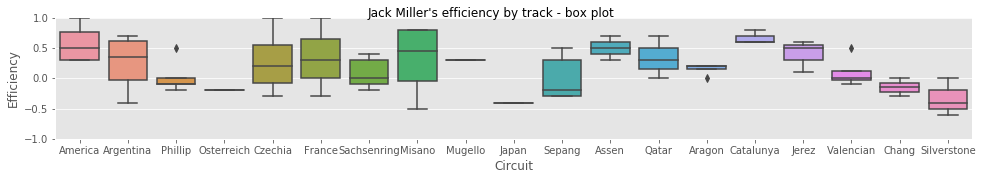

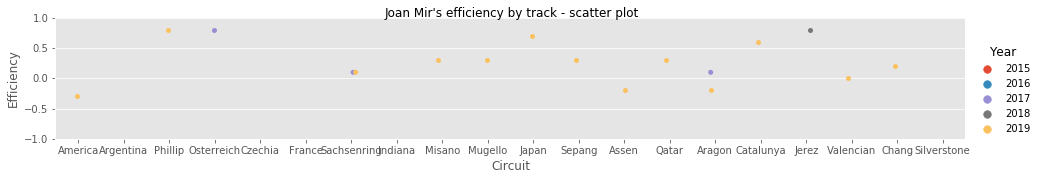

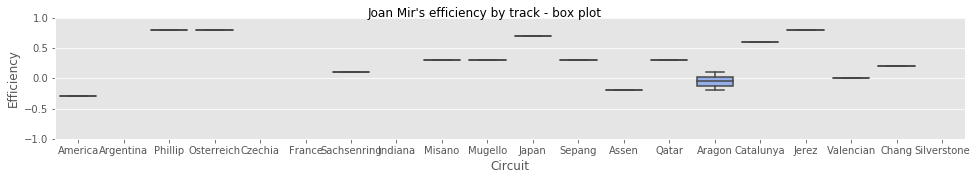

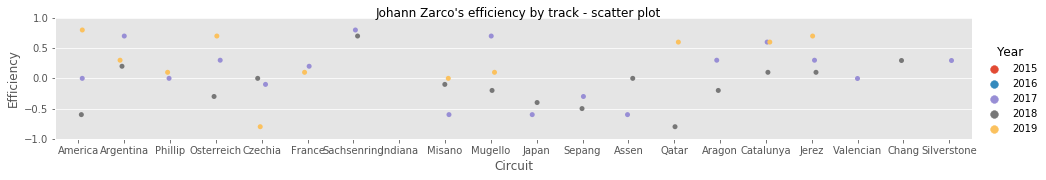

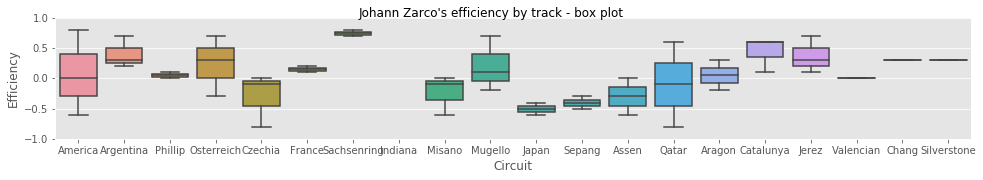

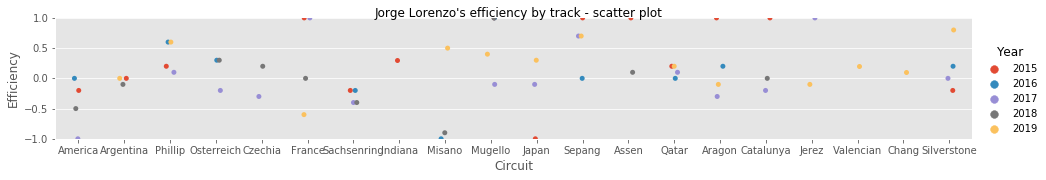

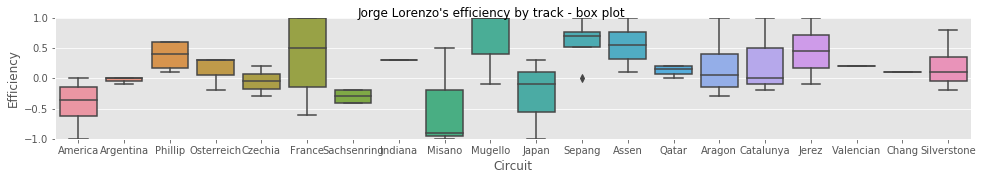

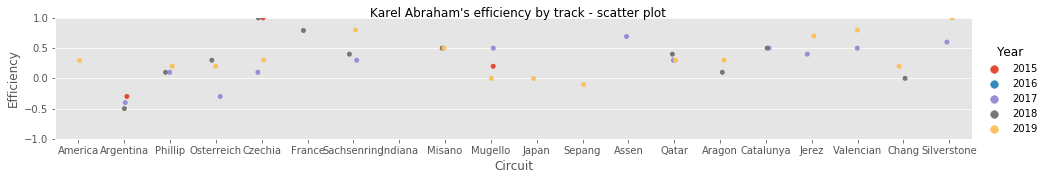

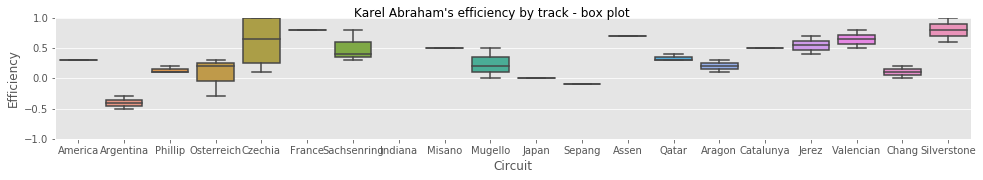

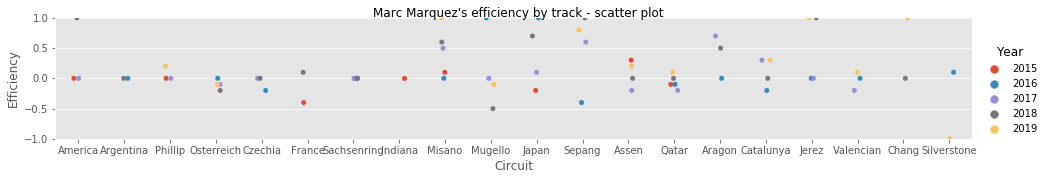

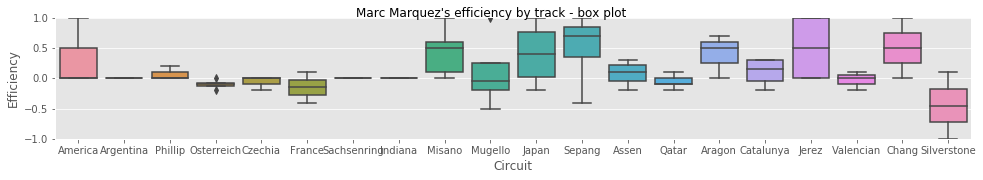

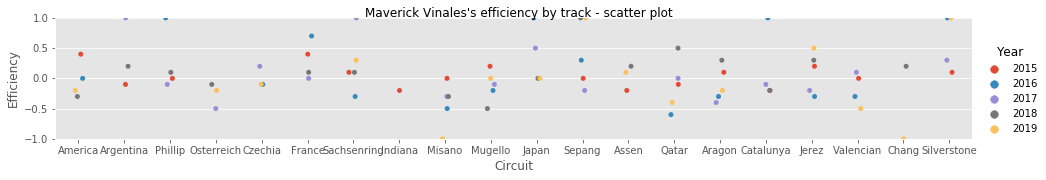

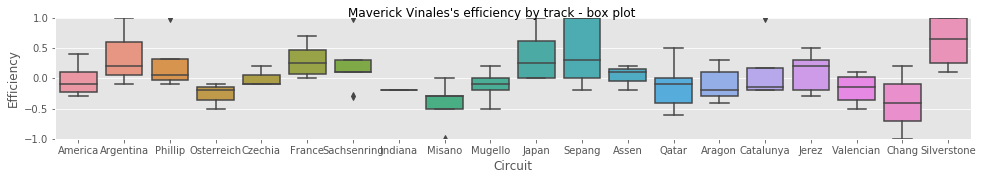

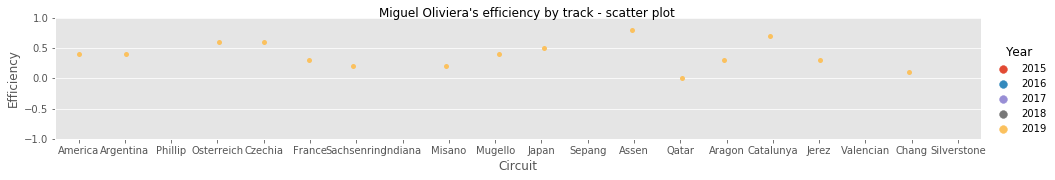

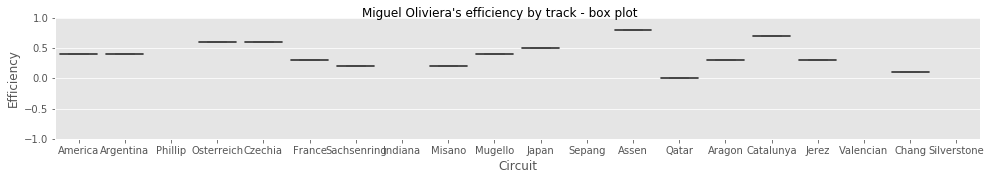

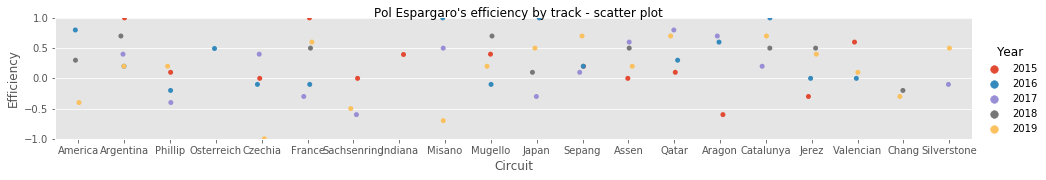

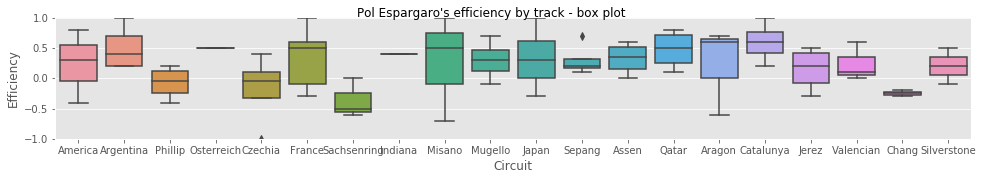

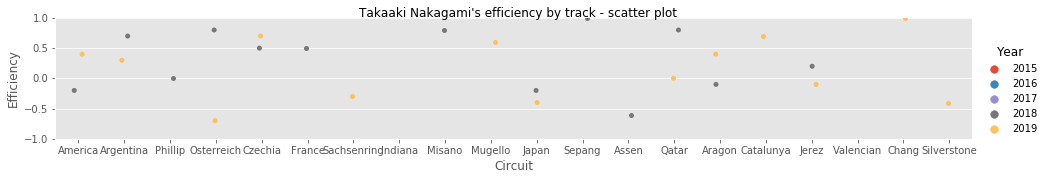

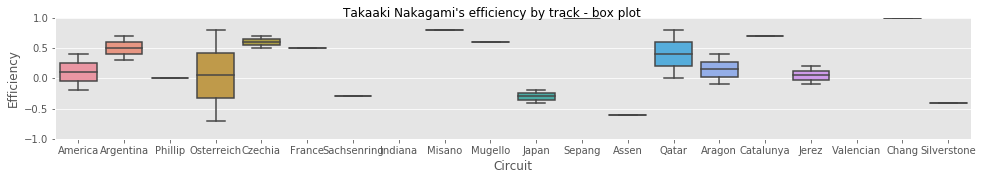

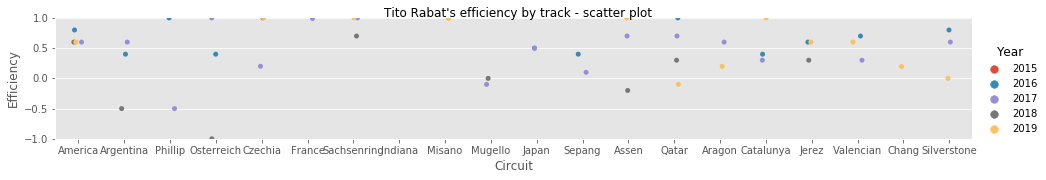

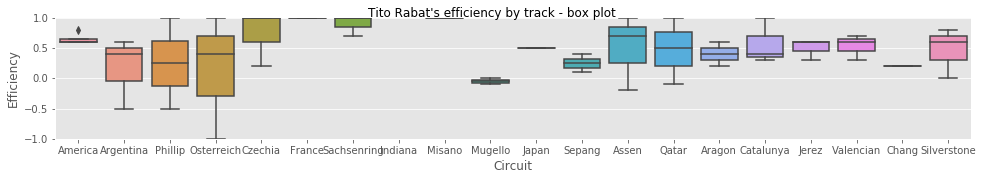

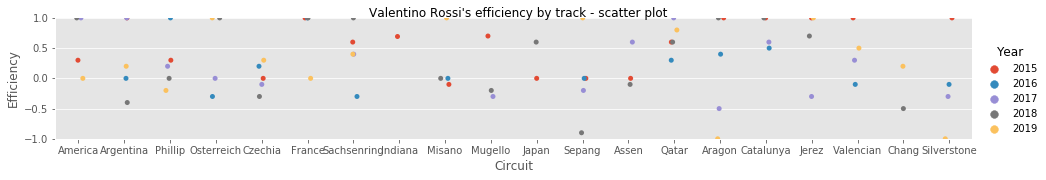

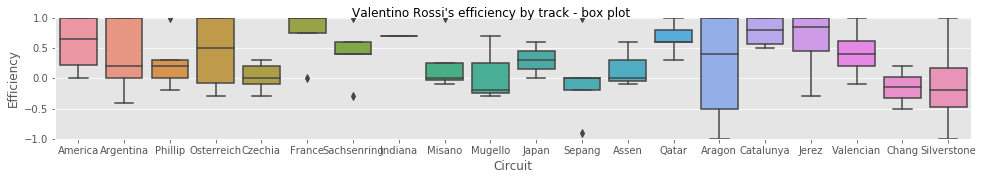

In [50]:
for k in rider_names:
    test = big_table[(big_table['Rider']==k)&(big_table['Grid']!=2222)]
    g2 = sns.catplot(x="Circuit", y="Efficiency", hue='Year', data=test, height=2.5, aspect=5.5)
    g2.set(ylim=(-1, 1))
    g2.fig.suptitle( k+"'s efficiency by track - scatter plot")
    
    g3 = sns.catplot(x="Circuit", y="Efficiency", kind="box", data=test, height=2.5, aspect=5.5)
    g3.set(ylim=(-1, 1))
    g3.fig.suptitle( k+"'s efficiency by track - box plot")
    
    plt.show()